In [137]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from importlib import reload
import defini_coef
reload(defini_coef)
import util
reload(util)
import simulation
reload(simulation)
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*
from simulation import *
from util import *
import exp_v_nb_mission as v_nb_m 
import copy
import numpy as np
import matplotlib.pyplot as plt

In [31]:
exps =[30,90]
workloads =[80,80]
seuil = [0,20, 70]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
r_range=range(1,11,1)
t= timeTotal


In [32]:
listDistri = [DistributionAvecRecuperationBas,DistributionAvecRecuperation, chacunSesJobAvecRecuperation, chacunSesJob, DistributionSansRecuperation, DistributionSansRecuperationBas]
listNameAlgo = ["DistributionAvecRecuperationBas","DistributionAvecRecuperation", "chacunSesJobAvecRecuperation", "chacunSesJob", "DistributionSansRecuperation", "DistributionSansRecuperationBas"]

In [33]:
timeAug = range(120,600,20)
nb_exp = 100
size_algo = len(listDistri)
count_overload = [] 
for i in range(size_algo):
    count_overload.append([])
for t in timeAug:
    overload=np.zeros(size_algo)
    for exp in range(nb_exp):
        tachePool = generateTacheAlter(t,timeRange)
        pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
        agentPool = pilotPool[:]
        AddIA(agentPool,0,seuil)
        
        for index,distri in enumerate(listDistri):
            ap = copy.deepcopy(agentPool)
            tp = copy.deepcopy(tachePool)
            tw = distri(ap,tp)
            if(sum(tw)>0):
                overload[index]+=1
    for index,j in enumerate(overload):
        count_overload[index].append(j)

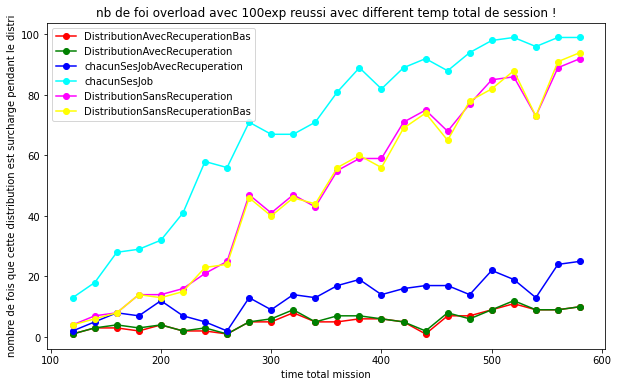

In [34]:
plt.figure(figsize=(10, 6))

couleurs = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
for index,ov in enumerate(count_overload):
    plt.plot(timeAug, ov, label=listNameAlgo[index]  , color=couleurs[index], marker='o')
    
# Title and labels
plt.title('nb de foi overload avec 100exp reussi avec different temp total de session !')
plt.xlabel('time total mission')
plt.ylabel('nombre de fois que cette distribution est surcharge pendant le distri')

# Legend
plt.legend()
plt.savefig('overload_algo.pdf')
plt.show()


In [35]:

recuperationRange = range(1,21,1)
nb_exp = 100
size_algo = len(listDistri)
count_overload_r = [] 
t = 300
for i in range(size_algo):
    count_overload_r.append([])
for r in recuperationRange:
    recuperation = r/10
    overload=np.zeros(size_algo)
    for exp in range(nb_exp):
        tachePool = generateTacheAlter(t,timeRange)
        pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
        agentPool = pilotPool[:]
        AddIA(agentPool,0,seuil)
        
        for index,distri in enumerate(listDistri):
            ap = copy.deepcopy(agentPool)
            tp = copy.deepcopy(tachePool)
            tw = distri(ap,tp)
            if(sum(tw)>0):
                overload[index]+=1
    for index,j in enumerate(overload):
        count_overload_r[index].append(j)

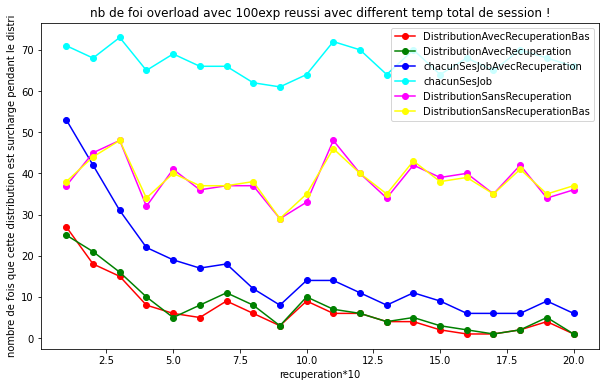

In [36]:
plt.figure(figsize=(10, 6))

couleurs = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
for index,ov in enumerate(count_overload_r):
    plt.plot(recuperationRange, ov, label=listNameAlgo[index]  , color=couleurs[index], marker='o')
    
# Title and labels
plt.title('nb de foi overload avec 100exp reussi avec different temp total de session !')
plt.xlabel('recuperation*10')
plt.ylabel('nombre de fois que cette distribution est surcharge pendant le distri')

# Legend
plt.legend()
plt.show()

## exp test different recovery fonction with stra avec recup bas

in the case tache ne sont pas coince les distribution sont les meme

In [37]:
import pilot_tache_distribution
reload(pilot_tache_distribution)
from pilot_tache_distribution import*
exps =[91,90]
workloads =[60,80]
seuil = [0,20, 70]
recuperation = 1
nb_mission = 10
timeRange = [9,18]
timeTotal = 240
nb_exp = 100
r_range=range(1,11,1)
t= timeTotal
tachePool = generateTacheAlter(t,timeRange, prob_tache= [5,4,1])
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)
pp = [copy.deepcopy(pilotPool1) for i in range(13)]
tp = [copy.deepcopy(tachePool) for i in range(13)]

In [38]:
import pilot_tache_distribution
reload(pilot_tache_distribution)
from pilot_tache_distribution import*
tachePool = generateTacheAlter(timeTotal,timeRange, prob_tache= [5,4,1])
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)
for p in pilotPool:
    print(p.miu)
pp = [copy.deepcopy(pilotPool1) for i in range(14)]
tp = [copy.deepcopy(tachePool) for i in range(14)]
for index in range(12):
    for p in pp[index]:
        p.r_b=1+ index*0.2
        p.r_a=(2-p.r_b)/15
        
    ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = "quad")
    print("")
    print(ov)
    print("quad ")
    print(p.r_a, p.r_b)
    print(index)
    for p in pp[index]:

        print(p.exp,p.tache)
print("\ndelay")
for p in pp[12]:
    p.r=2
    p.latency = 3
ov=DistributionAvecRecuperationBas(pp[12],tp[12], methode = "other")
print(ov)
for p in pp[12]:
    print(p)
print("exp")
ov=DistributionAvecRecuperationBas(pp[13],tp[13], methode = "exp")
print(ov)
for p in pp[13]:
    print(p)

0.0096
0.0096

[0, 0, 0]
quad 
0.06666666666666667 1.0
0
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
0.05333333333333334 1.2
1
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
0.04000000000000001 1.4
2
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
0.02666666666666666 1.6
3
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
0.01333333333333333 1.8
4
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
0.0 2.0
5
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
-0.013333333333333345 2.2
6
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
-0.02666666666666669 2.4000000000000004
7
91 [3, 9, 14]
90 [1, 6, 7, 8, 13, 16, 17]
0 [0, 2, 4, 5, 10, 11, 12, 15]

[0, 0, 0]
quad 
-0.04000000000000001 2.6
8
91 [3, 9, 14

## partie exp avec des repos extra

In [39]:
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*

In [40]:
def experience_recup(pilotPool1,tache_time, nb, pause = 10, nb_exp=100,prob_init=None,step= None,type_recup = None, recup_tache_list= False, index_pilot= 0):
    
    if prob_init is None:
        prob_init=[0.9,0.05,0.05]
    if step is None:
        step= [-0.1,0.075,0.025]
    if type_recup is None:
        type_recup = ["quad","other","exp"]
    overload_list = np.zeros((9,14))
    tachePoolAll = []
    testtachePool =[]
    portion_pilot = np.zeros((9,14))
    time_total = sum(tache_time)
    for i in range(9):
        for j in range(nb_exp):
            prob = [a + i*b for a, b in zip(prob_init, step)]
            tachepool = generateTacheNb(nb, tache_time, prob)
            tachePoolAll.append(tachepool)
            pp = [copy.deepcopy(pilotPool1) for i in range(15)]
            tp = [copy.deepcopy(tachepool) for i in range(15)]
            for recup in type_recup:
                if recup == "quad":
                    for index in range(0,10,2):
                        for p in pp[index]:
                            p.r_b=index/2*0.5
                            p.r_a=(1-p.r_b)/15
                        ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                        if(not sum(ov)):
                            portion_pilot[i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                        if(sum(ov)):
                            overload_list[i][index] += 1
                            for p in pp[index+1]:
                                p.r_b=index/2*0.5
                                p.r_a=(1-p.r_b)/15
                            if(not DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)):
                                overload_list[i][index+1] += 1
                            else:
                                portion_pilot[i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
                if recup == "other":
                    index = 10
                    ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                    if(not sum(ov)):
                        portion_pilot[i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                    if(sum(ov)):
                        overload_list[i][index] += 1
                        if( not DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)):
                            overload_list[i][index+1] += 1 
                        else:
                            portion_pilot[i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
                if recup == "exp":
                    index = 12
                    ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                    if(not sum(ov)):
                        portion_pilot[i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                    if(sum(ov)):    
                        overload_list[i][index] += 1
                        testtachePool= tp[14]
                        verif_pause= DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)
                        if(not verif_pause):
                            overload_list[i][index+1] += 1 
                        else:
                            portion_pilot[i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
    for i in range(9):
        for index in range(14):
            nb_ver = nb_exp
            if index % 2!=0:
                nb_ver=overload_list[i][index-1] 
            if overload_list[i][index] != nb_ver:
                nb_no_overload = nb_ver - overload_list[i][index]
                portion_pilot[i][index]  = portion_pilot[i][index]/nb_no_overload
            else:
                portion_pilot[i][index]  = 1.01
                
    if not recup_tache_list:
        return overload_list, testtachePool, portion_pilot
    else:
        return  overload_list, testtachePool, tachePoolAll, portion_pilot


In [41]:
def affichage_recup(overload_list, n_bins= 100,nb_step=9):
    stra_recup= ["quad a 1/15 b 0"," ", "quad a 1/30 b 0.5"," ","quad a 0 b 1"," ", "quad a -1/30 b 1.5"," ", "quad a -1/15 b 2"," ", "delay 3"," ", "exp"," ",]
    colors = [(0, 1, 0), (1, 0, 0)]  # 绿色到红色
    
    cmap = LinearSegmentedColormap.from_list('GreenToRed', colors, N=n_bins)

    # Affichage de la matrice
    fig, ax = plt.subplots(figsize=(14, 8))
    cax = ax.matshow(overload_list, cmap=cmap)

    # Suppression des axes
    #ax.axis('off')
    prob_list = []

    for  i in range(nb_step):
        prob = [round(a + i*b,3) for a, b in zip(prob_init, step)]
        prob_list.append(prob)
    ax.set_xticks(np.arange(14))

    ax.set_xticklabels(stra_recup, rotation=90)
    for (i, j), val in np.ndenumerate(overload_list):
        ax.text(j, i, f'{val*1:.0f}', ha='center', va='center', color='white')

    # Adding a color bar
    ax.set_yticks(np.arange(nb_step))
    ax.set_yticklabels(prob_list)

    ax.set_xlabel('type recup')  # Set the x-axis label
    ax.set_ylabel('distribution de tache [facile, medium, hard]')  # Set the y-axis label
    colorbar =plt.colorbar(cax)
    colorbar.set_label('nb des fois overload')
    plt.savefig("different_type_recup.pdf")
    plt.show()

In [42]:
def affichage_portion_pilot(portion_pilot, n_bins= 100):
    stra_recup= ["quad a 1/15 b 0"," ", "quad a 1/30 b 0.5"," ","quad a 0 b 1"," ", "quad a -1/30 b 1.5"," ", "quad a -1/15 b 2"," ", "delay 3"," ", "exp"," ",]
    colors = [(0, 1, 0), (1, 0, 0)]  # 绿色到红色
    
    cmap = LinearSegmentedColormap.from_list('GreenToRed', colors, N=n_bins)

    # Affichage de la matrice
    fig, ax = plt.subplots(figsize=(14, 8))
    cax = ax.matshow(portion_pilot, cmap=cmap)

    # Suppression des axes
    #ax.axis('off')
    prob_list = []

    for  i in range(9):
        prob = [round(a + i*b,3) for a, b in zip(prob_init, step)]
        prob_list.append(prob)
    ax.set_xticks(np.arange(14))

    ax.set_xticklabels(stra_recup, rotation=90)
    for (i, j), val in np.ndenumerate(portion_pilot):
        if val<=1:
            ax.text(j, i, f'{val*100:.000f}', ha='center', va='center', color='white')
        else:
            ax.text(j, i, f'{None}', ha='center', va='center', color='white')

    # Adding a color bar
    ax.set_yticks(np.arange(9))
    ax.set_yticklabels(prob_list)

    ax.set_xlabel('type recup')  # Set the x-axis label
    ax.set_ylabel('distribution de tache [facile, medium, hard]')  # Set the y-axis label
    colorbar =plt.colorbar(cax)
    colorbar.set_label('pourcentage de tache la  pilot specifique prends en charge ')
    plt.savefig("portion_pilot.pdf")
    plt.show()

In [43]:
def affichage_MultiTachePool(tachePools, poolLength,tache_time):
    nb_exp = len(tachePools)/9
    if nb_exp == 1:
        tache_level_map= np.zeros((9,poolLength))
        for index, tachepool in enumerate(tachePools):
            for i,t in enumerate(tachepool):
                tache_level_map[index][i]= t.level
    
    light_red = '#ffcccc'  # Light red
    medium_red = '#ff6666'  # Medium red
    dark_red = '#cc0000'  # Dark red

    # Create a list of colors
    red_shades = [light_red, dark_red]

    # Create a colormap that transitions through the specified colors
    cmap = LinearSegmentedColormap.from_list("RedShades", red_shades, N=3)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.matshow(tache_level_map, cmap=cmap)
    prob_list = []
    for  i in range(9):
        prob = [round(a + i*b,3) for a, b in zip(prob_init, step)]
        prob_list.append(prob)
        
    ax.set_xticks(np.arange(poolLength))

    ax.set_xticklabels(tache_time, rotation=90)
    ax.set_yticks(np.arange(9))
    ax.set_yticklabels(prob_list)
    ax.set_ylabel('distribution de tache [facile, medium, hard]')

    # Plotting
    colorbar =plt.colorbar(cax)
    colorbar.set_label('level de la tache')
    
    plt.show()

In [44]:
def generateTachetime(nb, centre= 15, sigma = 3, borne_inf = 9, borne_sup= 25):
    mu = centre # mean
    n_samples = nb  # number of samples

    # Generate random numbers from a Gaussian distribution
    float_samples = np.random.normal(mu, sigma, n_samples)

    # Round to the nearest integer
    int_samples = np.round(float_samples).astype(int)
    for index, item in enumerate(int_samples):
        if item < borne_inf:
            int_samples[index] = borne_inf
        if item > borne_sup:
            int_samples[index] = borne_sup
    return int_samples

### preset parametre

In [45]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21,9]
workloads =[80, 80, 80]
seuil = [0,20, 70]
recuperation = 1
nb= 16
tache_time = np.array([16, 16, 16, 17, 16, 16, 14, 12, 14, 14, 16, 13, 13, 13, 14, 14])

pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)


### 1 exp si le tache ne sont pas effectuable on ajoute 10 min de repo

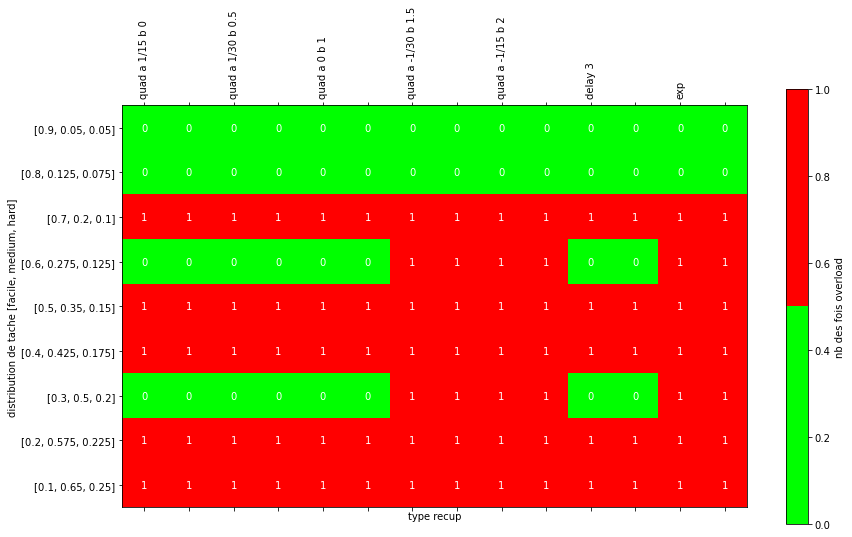

In [46]:
overload_list,testtachePool, tachePoolAll, portion_pilot=experience_recup(pilotPool1,tache_time = tache_time,nb=nb, nb_exp = 1, recup_tache_list =True)
affichage_recup(overload_list,n_bins =2)


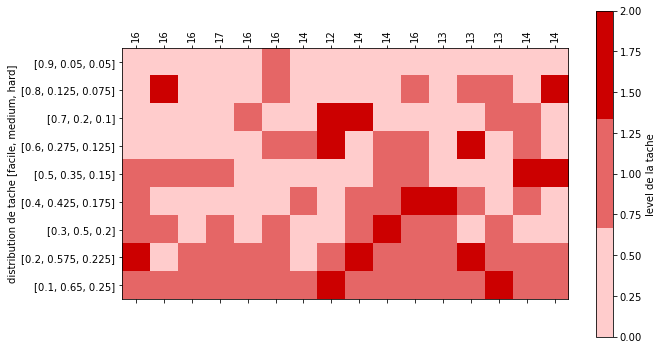

In [47]:
affichage_MultiTachePool(tachePoolAll, nb,tache_time)

### 100exp

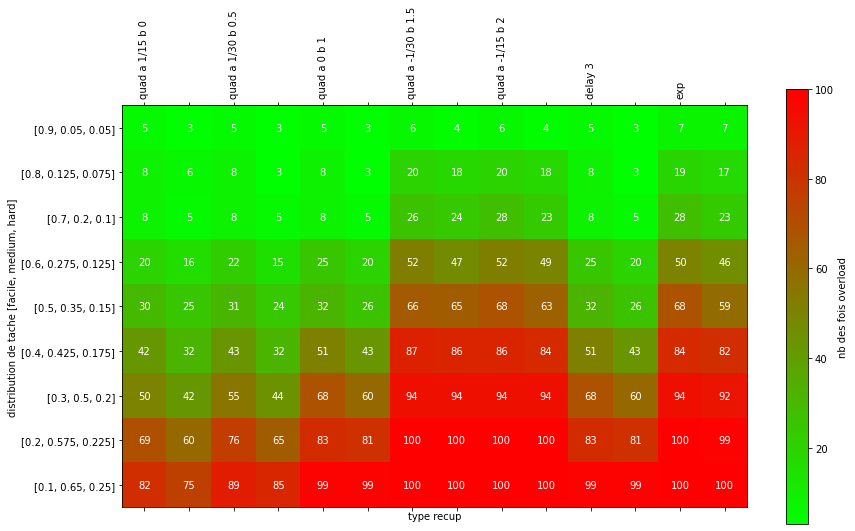

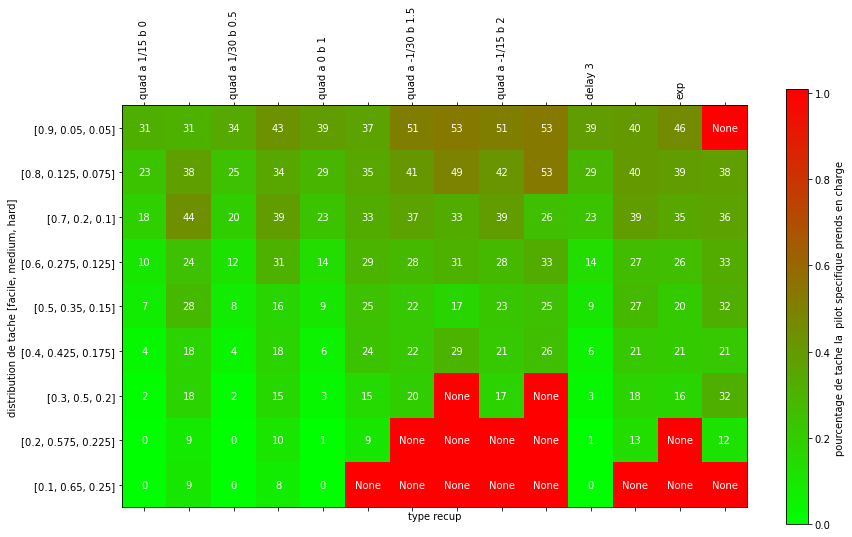

In [48]:

overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb,index_pilot=3)
affichage_recup(overload_list)
affichage_portion_pilot(portion_pilot)

### avec 20-40 min pause

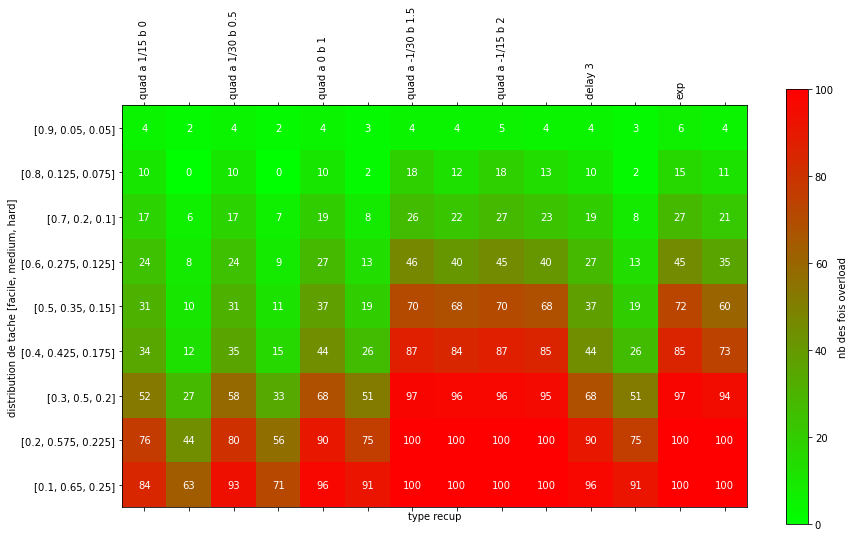

In [49]:
overload_list,testtachePool, portion_pilot=experience_recup(pilotPool1,tache_time = tache_time,nb=nb, pause = 20)
affichage_recup(overload_list)

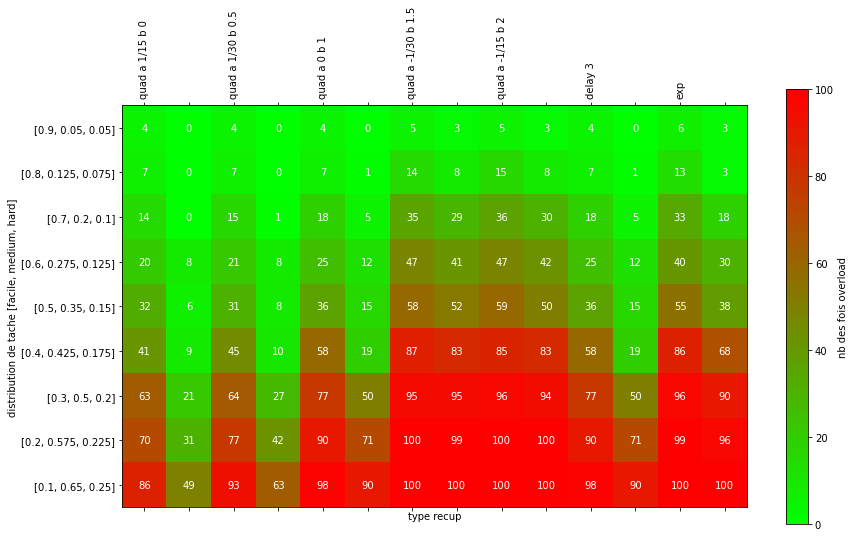

In [50]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1,tache_time = tache_time,nb=nb ,pause = 30)
affichage_recup(overload_list)

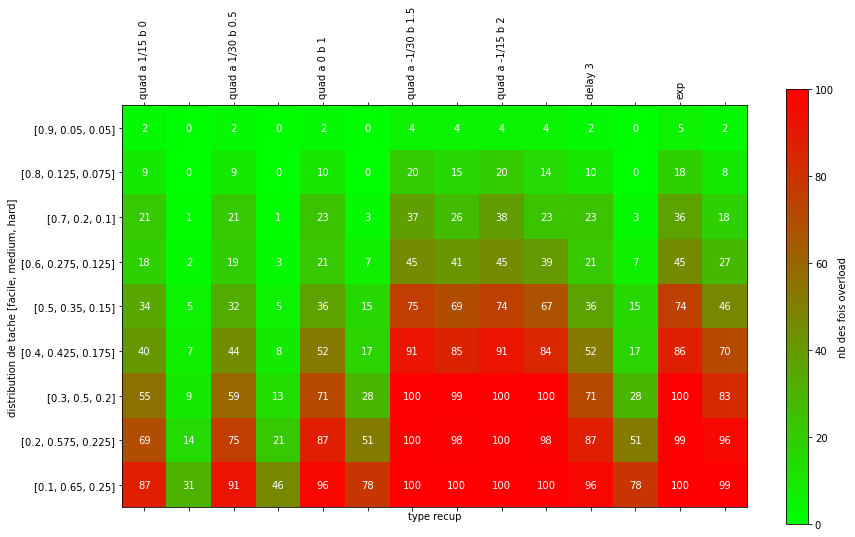

In [51]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1,tache_time = tache_time,nb=nb, pause = 40)
affichage_recup(overload_list)

### 400 min de  pause

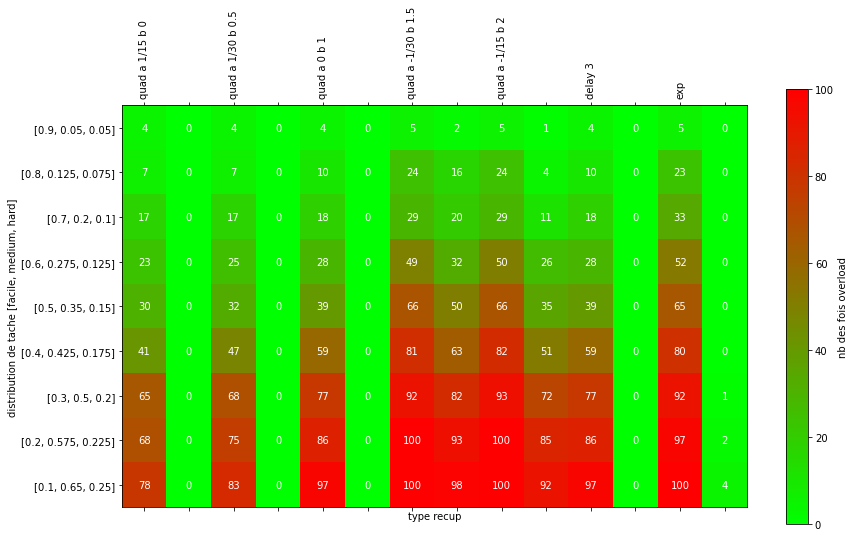

In [52]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1,tache_time = tache_time,nb=nb, pause = 400)
affichage_recup(overload_list)

## partie exp avec des repos extra avec 100tache 

In [53]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,90]
workloads =[80,80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)


In [54]:
print(tache_time)
print(sum(tache_time)/60)

[14 15 15 19 18 22 14 11 14 15 13 15 17 15 12  9 17 15 15 22  9 18 11 13
 13 17 15  9 18 14 15 16 17 14 12 16 16 20  9 14 12 13 16 16 17 18 18 19
 11 11 18 18 13 15 12 20 24 20 19 17 18 17 15 11 12 16 12 14 14 18 13 17
 11 21 16 16 18 12 11 14 12 14 14  9 12 15 17 12 12 12 13 15 13 11 15 13
 14  9 17 22]
24.783333333333335


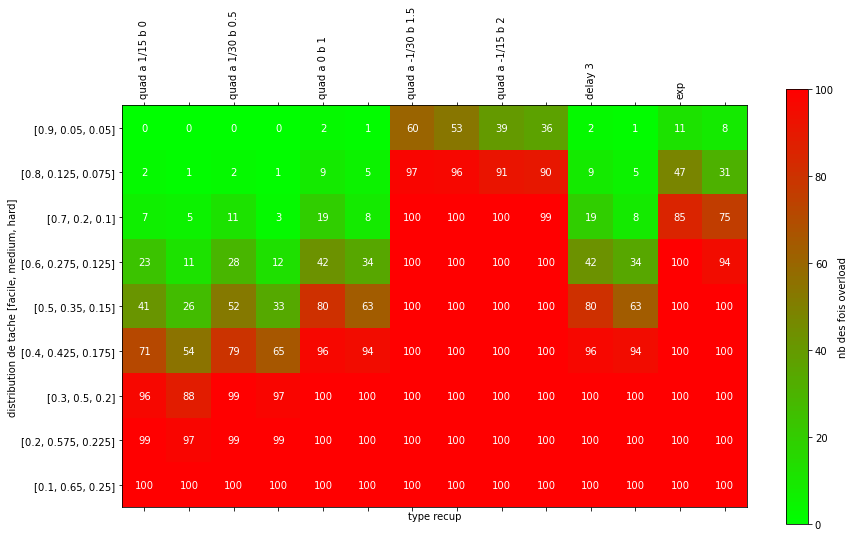

In [55]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

In [56]:
print(len(tache_time))

100


In [57]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,90]
workloads =[80,80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)


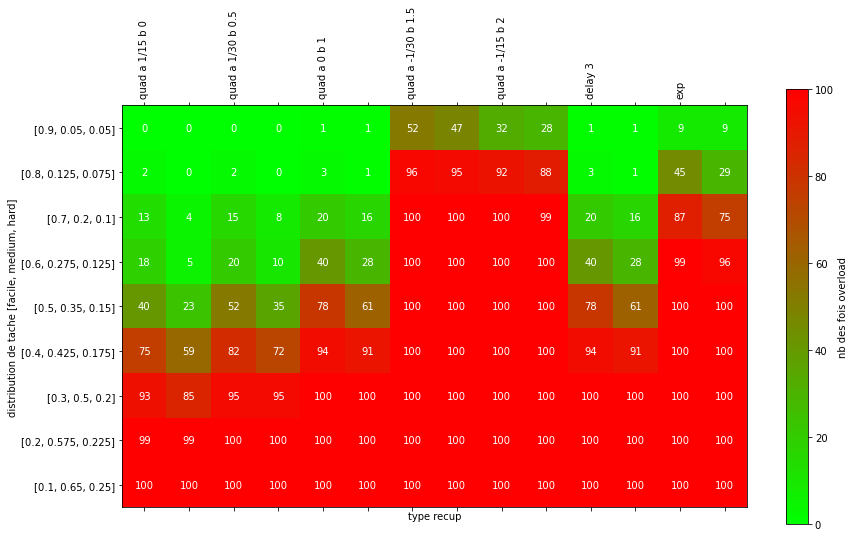

In [58]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

# partie avec des Pilot niveau 1 niveau2 niveau 3

In [59]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21,9]
workloads =[80, 80, 80]
seuil = [0,20, 70]
recuperation = 1
nb= 16
tache_time = np.array([16, 16, 16, 17, 16, 16, 14, 12, 14, 14, 16, 13, 13, 13, 14, 14])

pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)

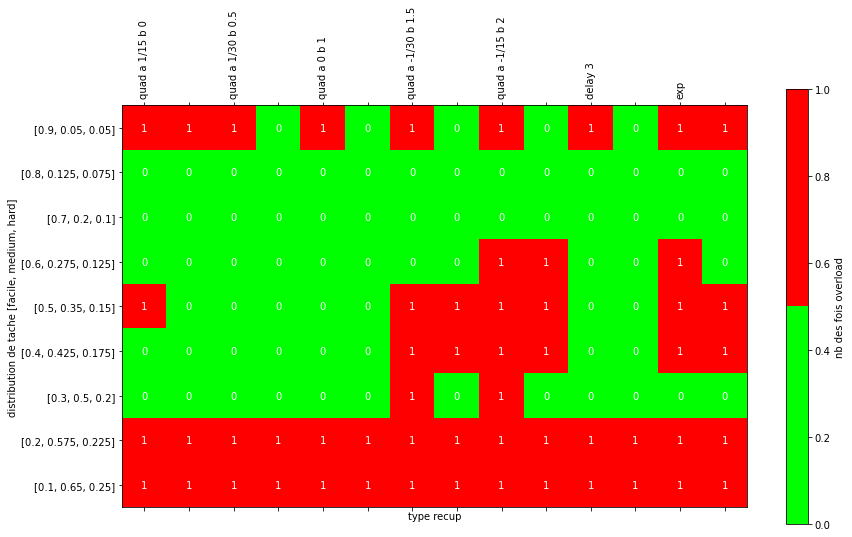

In [60]:
overload_list,testtachePool, tachePoolAll, portion_pilot =experience_recup(pilotPool1,tache_time = tache_time,nb=nb, nb_exp = 1, recup_tache_list =True)
affichage_recup(overload_list,n_bins =2)

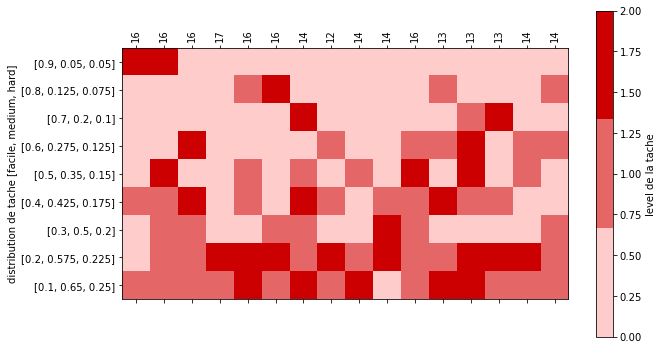

In [61]:
affichage_MultiTachePool(tachePoolAll, nb,tache_time)

## avec 100 exp

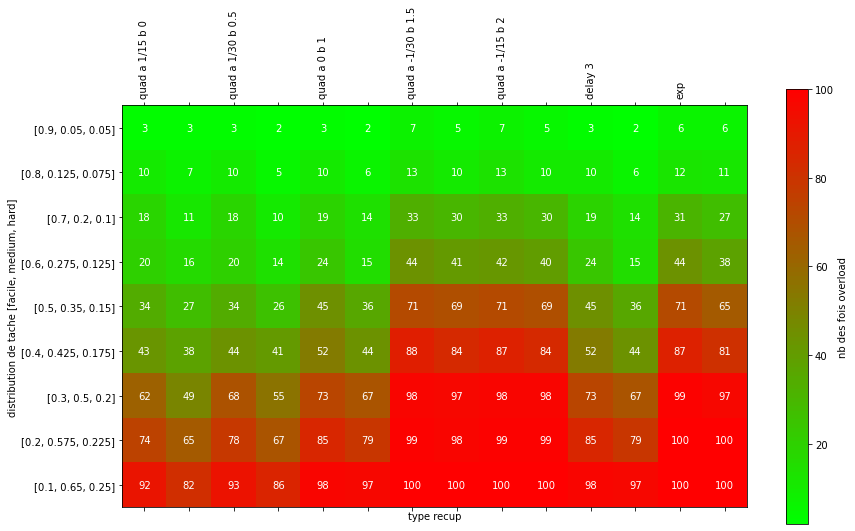

In [62]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

# partie avec 100 mission

In [63]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21,9]
workloads =[80, 80, 80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)


In [64]:
print(tache_time)
print(sum(tache_time)/60)

[12 17 18 12 16 13 16 12 14 15 20 15 16  9 10 13 11 12 12 19 15 18 16 15
 11 12 11 17 16 15 14 16 17 14 16 12 15 15 15 14 15 13 13 15 15 20  9 16
 16 16 14 17 17 14 12 19 13 19  9 15 13 15 19 11 13 16 10 15 17 17 15 17
 13  9 10 16 17 17 19 13 19 19 17 15 13 16 15 19 19 15 11 15 13 10 19 16
 10 18 16 17]
24.616666666666667


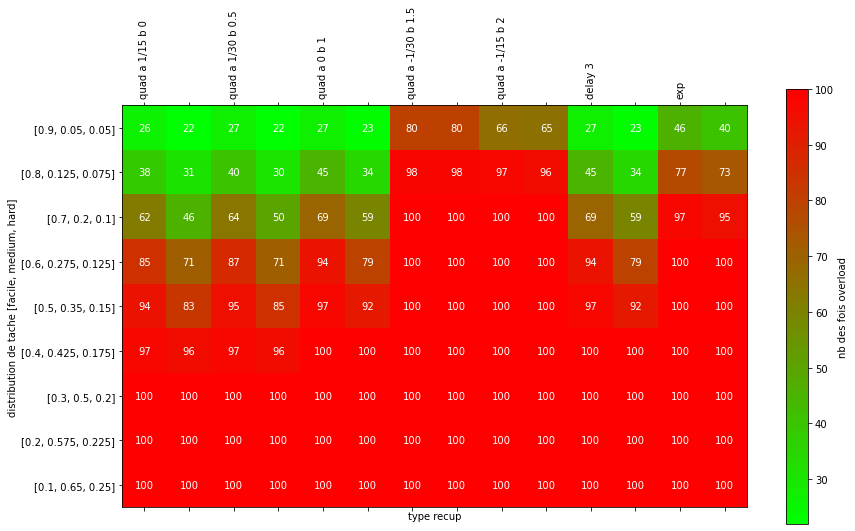

In [65]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

In [66]:
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*

In [67]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21,9]
workloads =[80,80,80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]


In [68]:
for  p in pilotPool1:
    print(p)

Pilot(exp=91, level=2, workload=80, tache=[], r=1, capacite=80, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=21, level=1, workload=80, tache=[], r=1, capacite=80, t=0, needUpdate=False, updatePoint=0,nature=0)
Pilot(exp=9, level=0, workload=80, tache=[], r=1, capacite=80, t=0, needUpdate=False, updatePoint=0,nature=0)


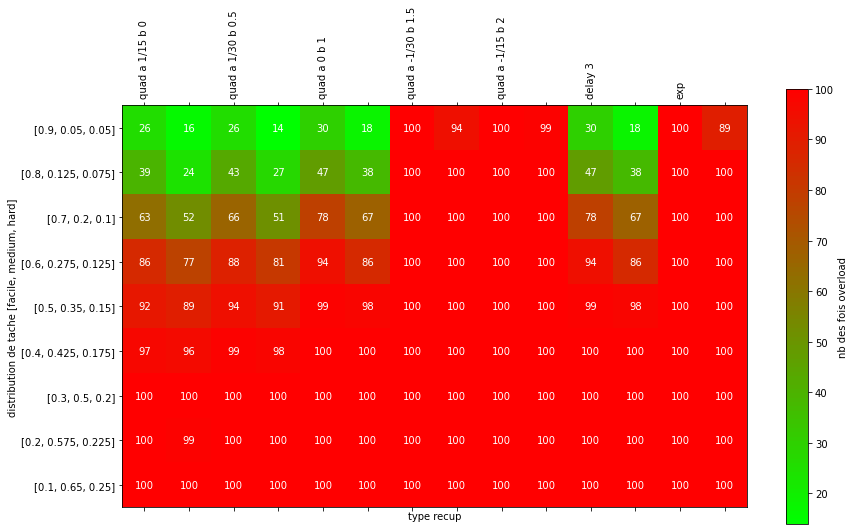

In [69]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)


In [70]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21]
workloads =[80,80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]
AddIA(pilotPool1,0,seuil)

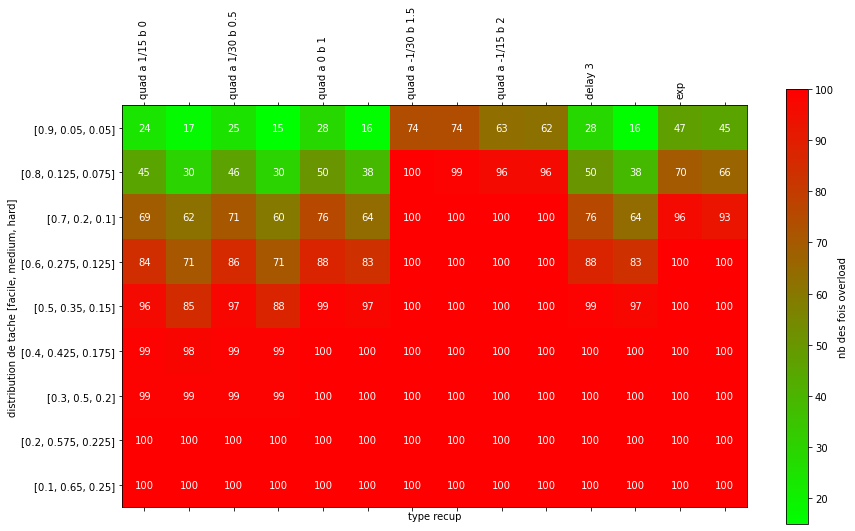

In [71]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

In [72]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
exps =[91,21]
workloads =[80,80]
seuil = [0,20, 70]
recuperation = 1
nb= 100
tache_time = generateTachetime(100)
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
pilotPool1 = pilotPool[:]


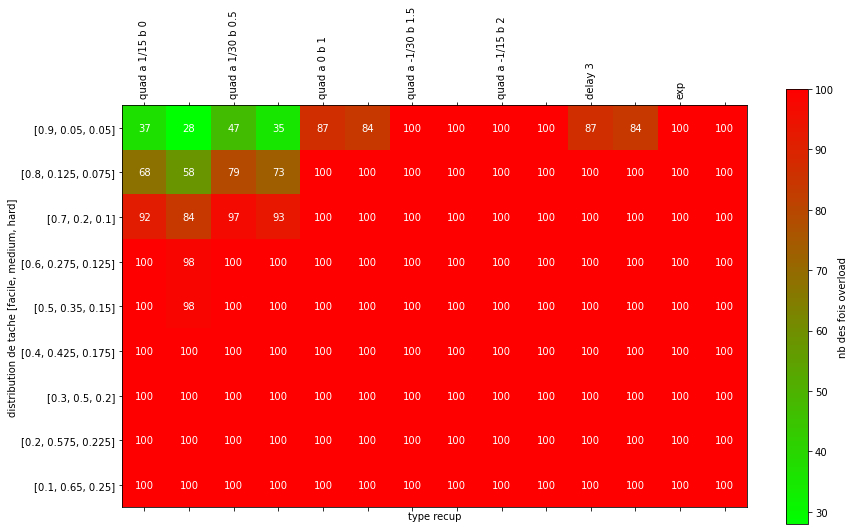

In [73]:
overload_list,testtachePool, portion_pilot =experience_recup(pilotPool1, tache_time = tache_time,nb=nb)
affichage_recup(overload_list)

# comparaison  add ia niveau1 vs humain niveau1

In [74]:
prob_init = [0.9,0.05,0.05]
step= [-0.1,0.075,0.025]
type_recup = ["quad","other","exp"]
seuil = [0,20, 70]
recuperation = 1
nb= 100


In [75]:
def experience_recup_multiSetPilot(MultiPilotPool,tache_time, nb, pause = 10, nb_exp=100,prob_init=None,step= None,type_recup = None, recup_tache_list= False, index_pilot= 0,nb_step=9):
    
    if prob_init is None:
        prob_init=[0.9,0.05,0.05]
    if step is None:
        step= [-0.1,0.075,0.025]
    if type_recup is None:
        type_recup = ["quad","other","exp"]
    
    time_total = sum(tache_time)
    l = len(MultiPilotPool)
    overload_list = np.zeros((l,nb_step,14))

    portion_pilot = np.zeros((l,nb_step,14))
    
    
    for i in range(nb_step):
        for j in range(nb_exp):
            prob = [a + i*b for a, b in zip(prob_init, step)]
            tachepool = generateTacheNb(nb, tache_time, prob)
            for indexPool, pilotPool1 in enumerate(MultiPilotPool):
                pp = [copy.deepcopy(pilotPool1) for i in range(15)]
                tp = [copy.deepcopy(tachepool) for i in range(15)]
                for recup in type_recup:
                    if recup == "quad":
                        for index in range(0,10,2):
                            for p in pp[index]:
                                p.r_b=index/2*0.5
                                p.r_a=(1-p.r_b)/15
                            ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                            if(not sum(ov)):
                                portion_pilot[indexPool][i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                            if(sum(ov)):
                                overload_list[indexPool][i][index] += 1
                                for p in pp[index+1]:
                                    p.r_b=index/2*0.5
                                    p.r_a=(1-p.r_b)/15
                                if(not DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)):
                                    overload_list[indexPool][i][index+1] += 1
                                else:
                                    portion_pilot[indexPool][i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
                    if recup == "other":
                        index = 10
                        ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                        if(not sum(ov)):
                            portion_pilot[indexPool][i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                        if(sum(ov)):
                            overload_list[indexPool][i][index] += 1
                            if( not DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)):
                                overload_list[indexPool][i][index+1] += 1 
                            else:
                                portion_pilot[indexPool][i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
                    if recup == "exp":
                        index = 12
                        ov=DistributionAvecRecuperationBas(pp[index],tp[index],methode = recup)
                        if(not sum(ov)):
                            portion_pilot[indexPool][i][index] += sum(tache_time[pp[index][index_pilot].tache])/time_total
                        if(sum(ov)):    
                            overload_list[indexPool][i][index] += 1
                            verif_pause= DistributionAvecRecuperationBasRepo(pp[index+1],tp[index+1],methode = recup, pause = pause)
                            if(not verif_pause):
                                overload_list[indexPool][i][index+1] += 1 
                            else:
                                portion_pilot[indexPool][i][index+1] += sum(tache_time[pp[index+1][index_pilot].tache])/time_total
    for i in range(nb_step):
        for index in range(14):
            for indexPool in range(l):
                nb_ver = nb_exp
                if index % 2!=0:
                    nb_ver=overload_list[indexPool][i][index-1] 
                if overload_list[indexPool][i][index] != nb_ver:
                    nb_no_overload = nb_ver - overload_list[indexPool][i][index]
                    portion_pilot[indexPool][i][index]  = portion_pilot[indexPool][i][index]/nb_no_overload
                else:
                    portion_pilot[indexPool][i][index]  = 1.01
                
    return overload_list,  portion_pilot
    


In [76]:
## partie multiset pilot meme tache IA niveau 1 remplace h niveau 1 ou simple ajoute niveau1 avec 16tache

In [77]:
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*

In [78]:
exps =[91,21,9]
exps_san_niveau1= [91,21]
workloads =[80,80,80]
workloads_san_niveau1 = [80,80]
tache_time = generateTachetime(16)
nb= 16
# 3 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 2 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 3 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)

In [79]:
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 2)

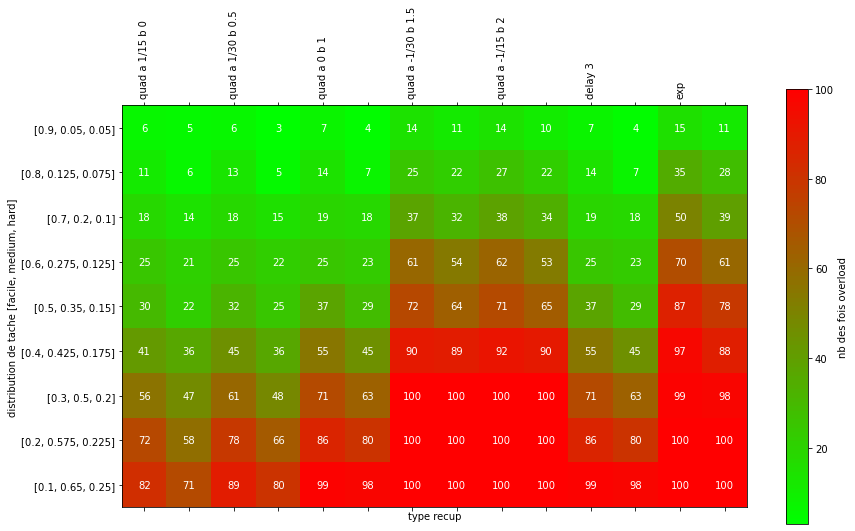

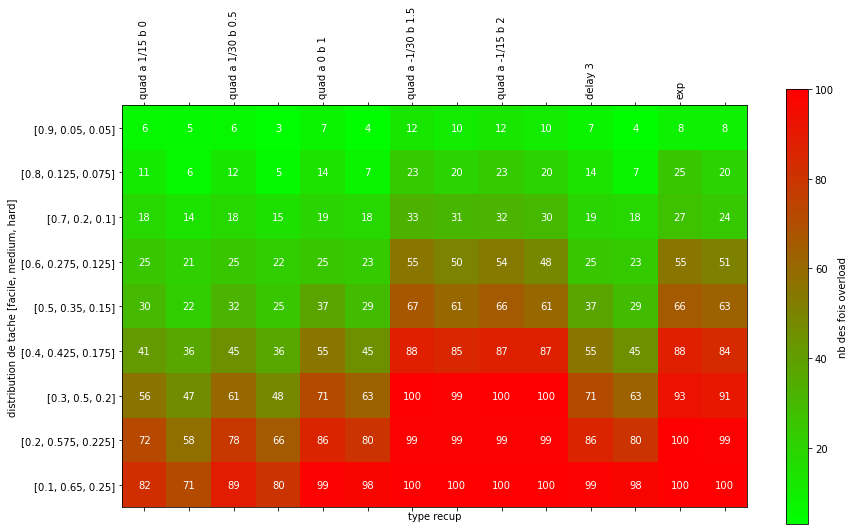

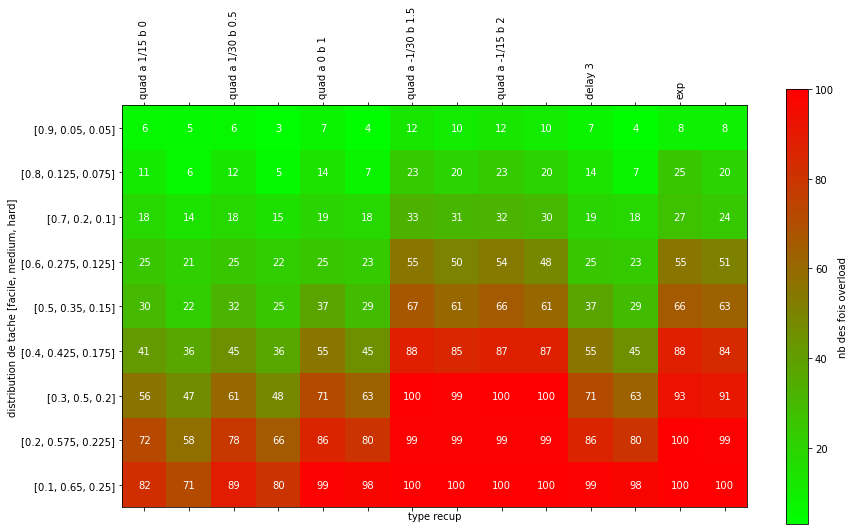

In [80]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

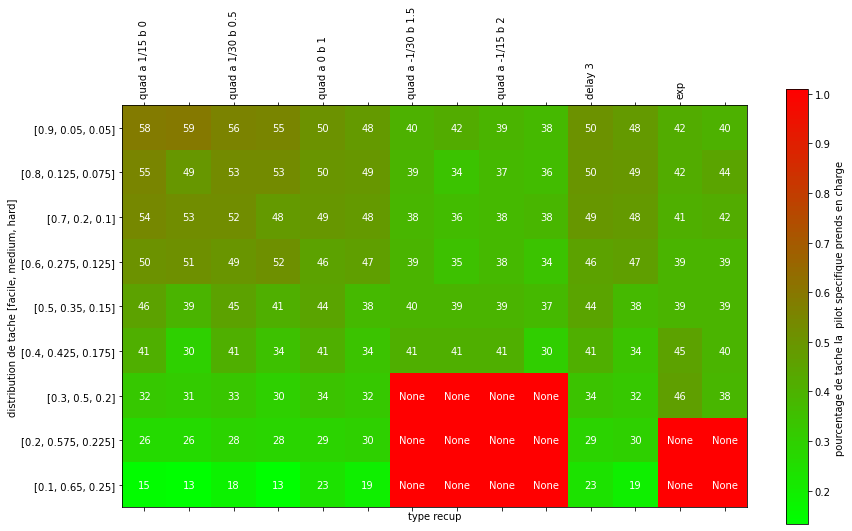

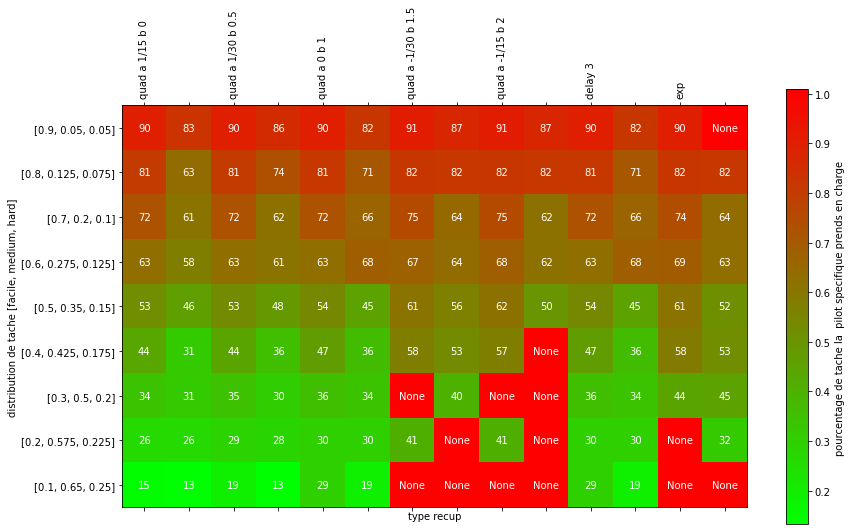

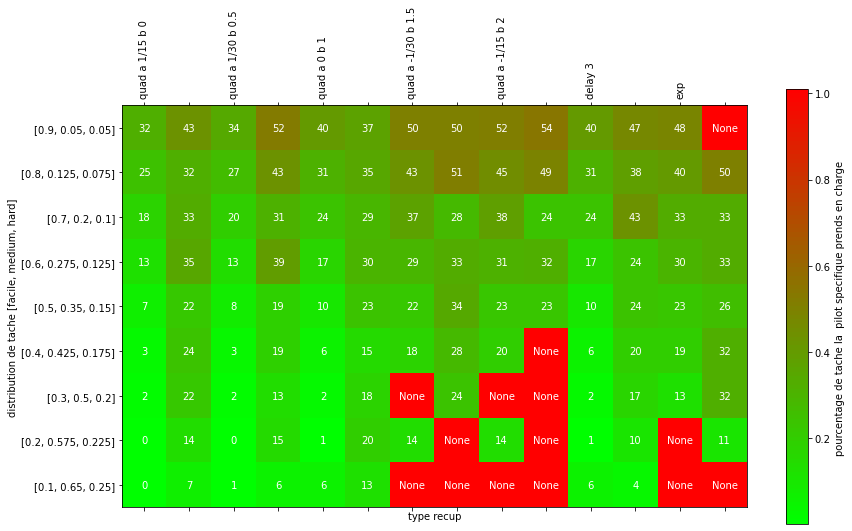

In [81]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [82]:
## avec 100 tache 

In [83]:
exps =[91,21,9]
exps_san_niveau1= [91,21]
workloads =[80,80,80]
workloads_san_niveau1 = [80,80]
tache_time = generateTachetime(100)
nb= 100
# 3 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 2 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 3 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 2)

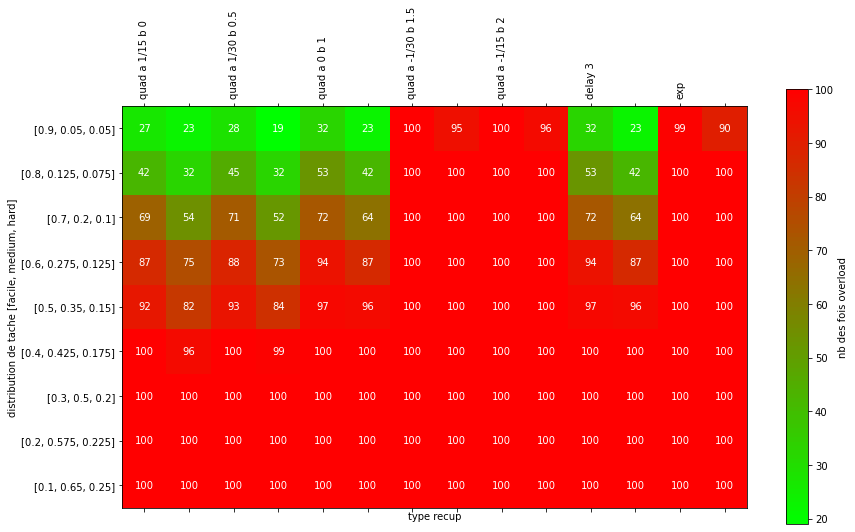

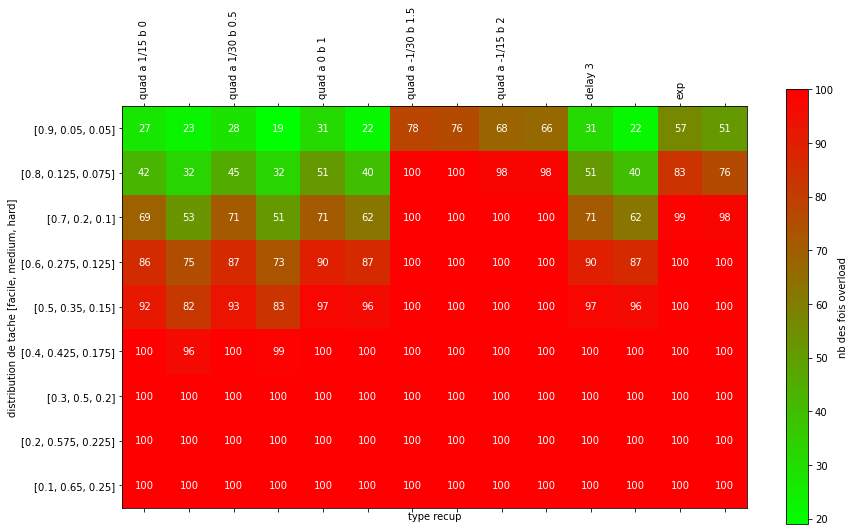

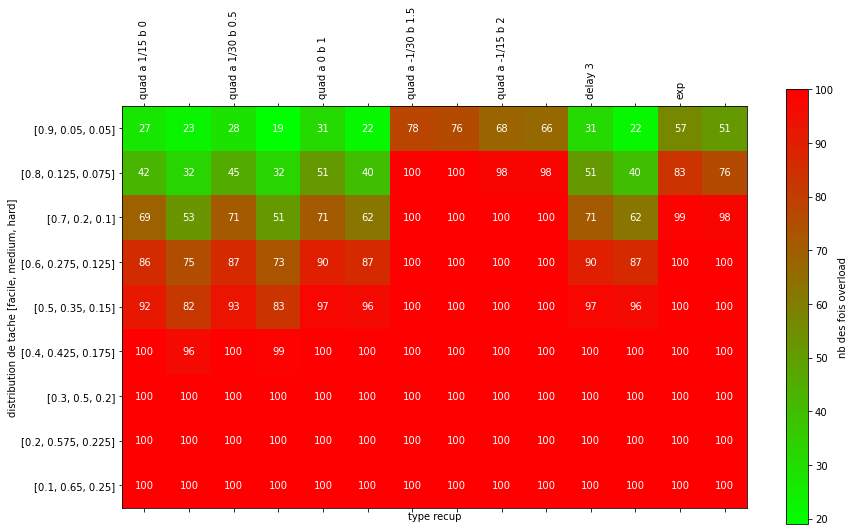

In [84]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

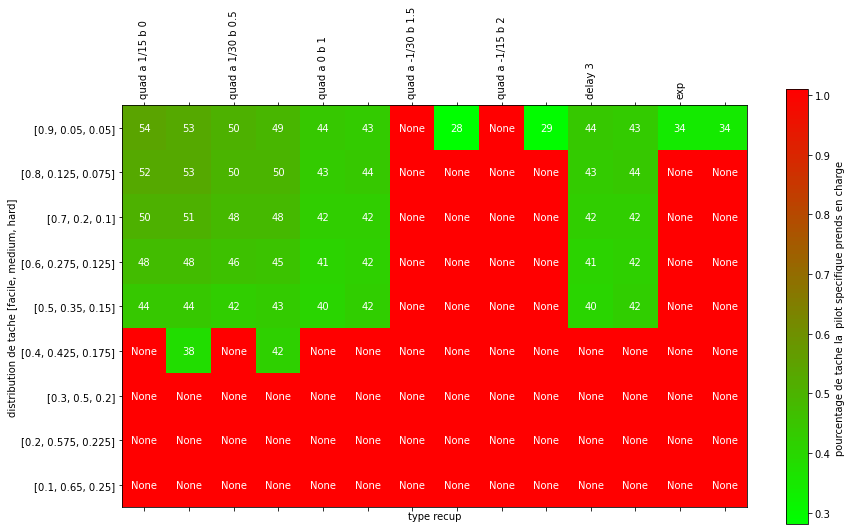

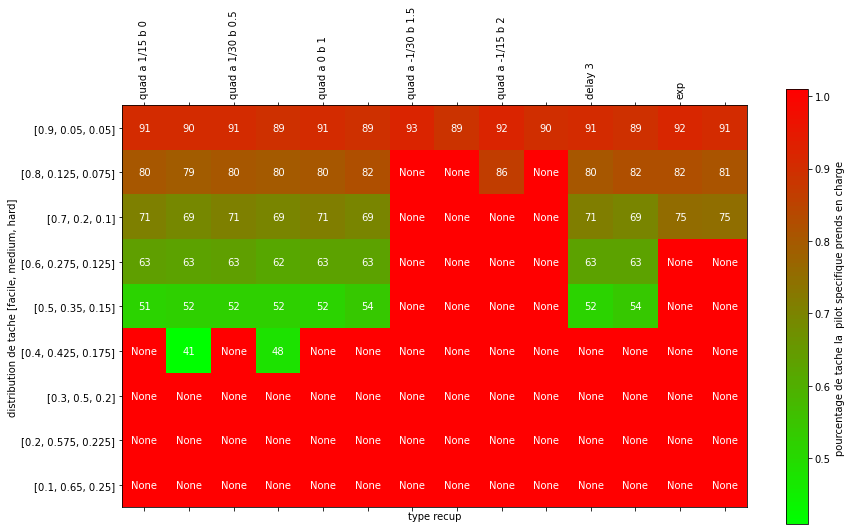

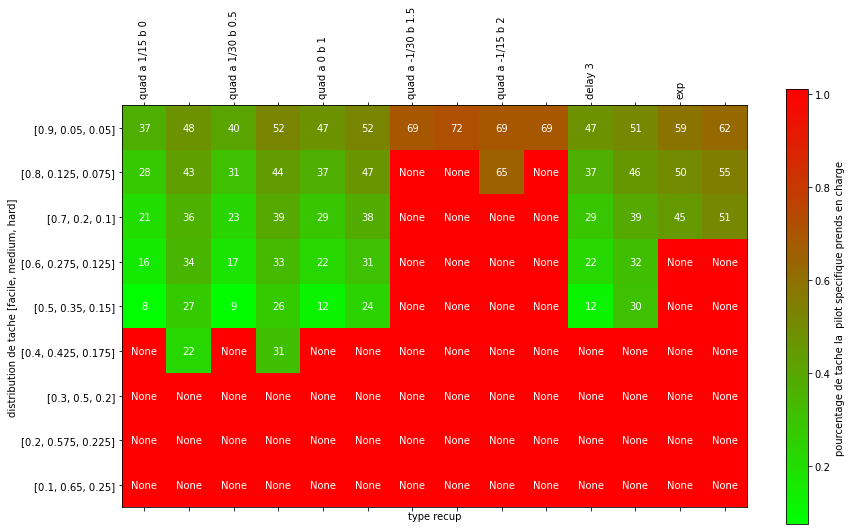

In [85]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [86]:
## en diminuant le nombre de pilot

In [144]:
exps =[91,9]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(100)
nb= 100
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool[:]
AddIA(pilotPool2,0,seuil)
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

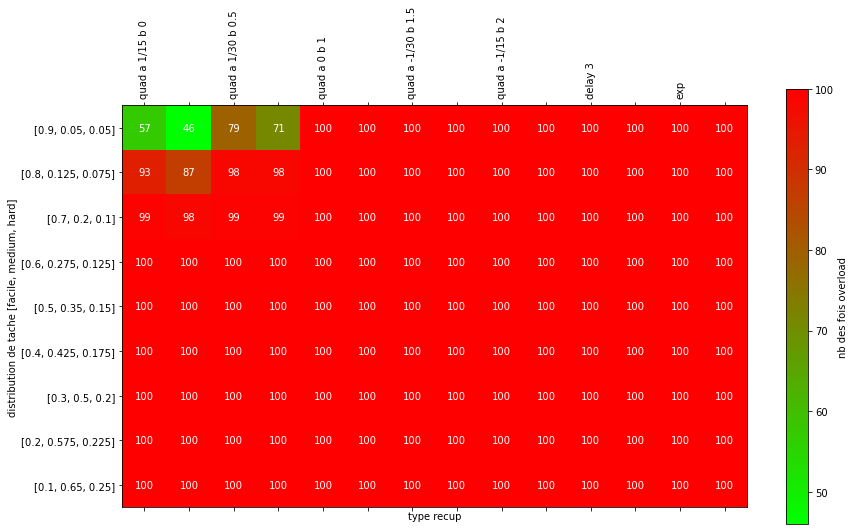

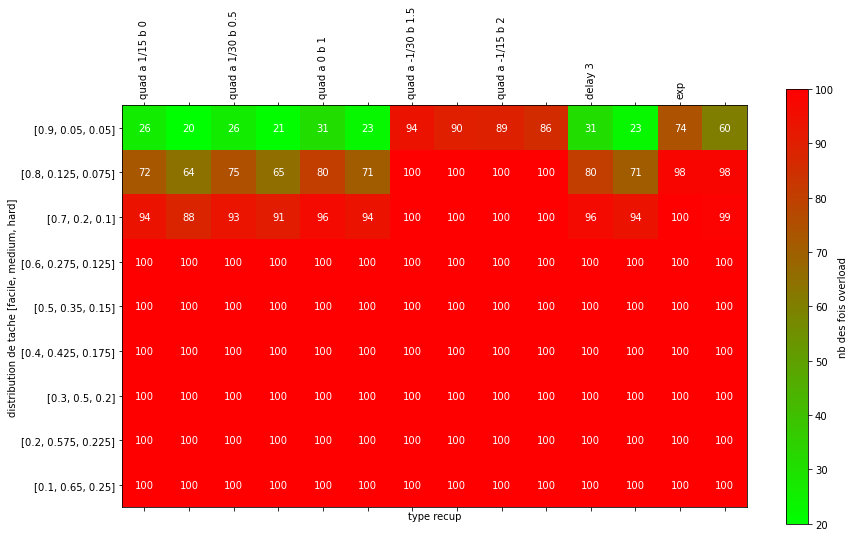

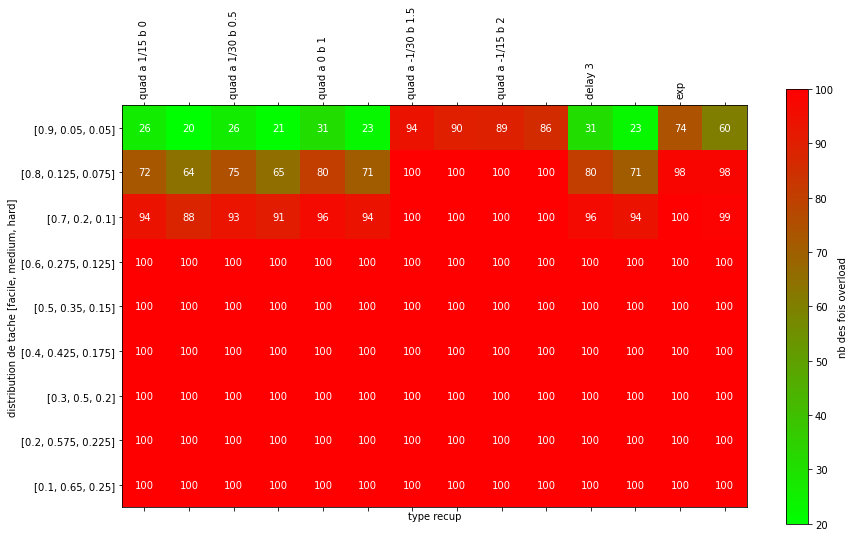

In [145]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

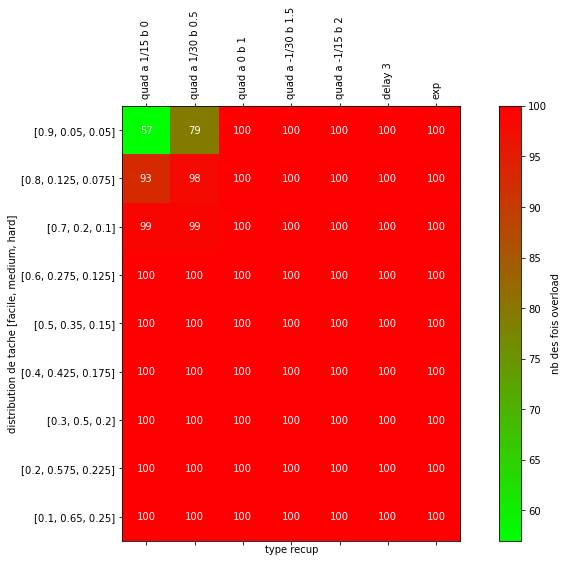

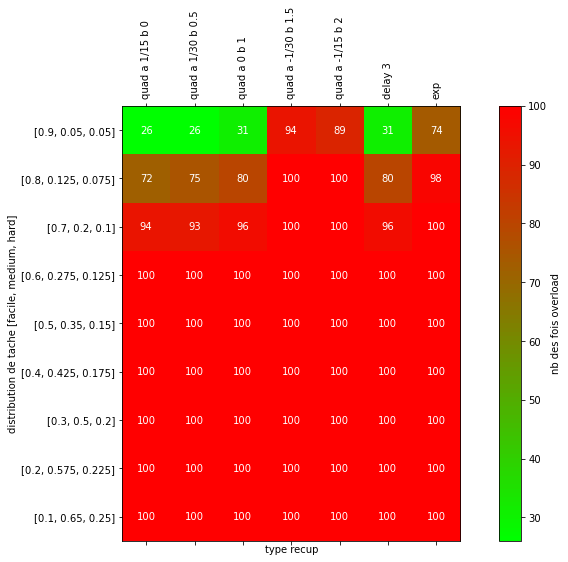

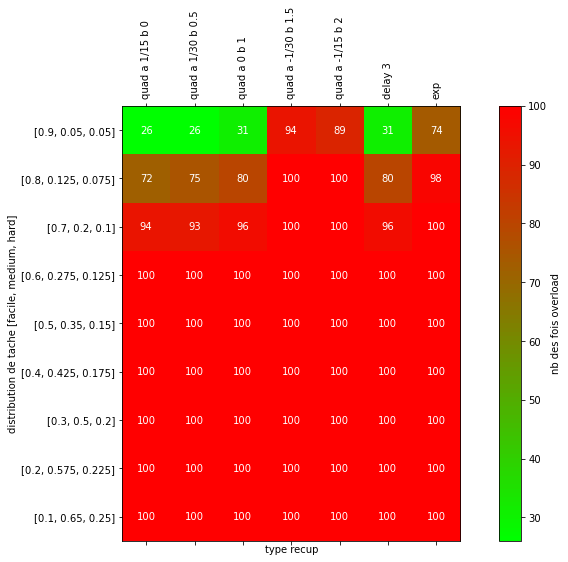

In [146]:
for overload_list in overload_list_all:
    affichage_recup1(overload_list)

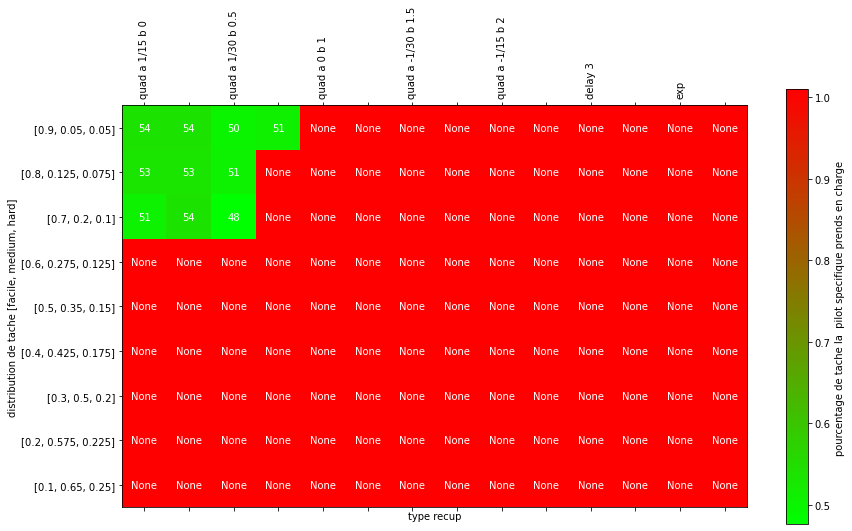

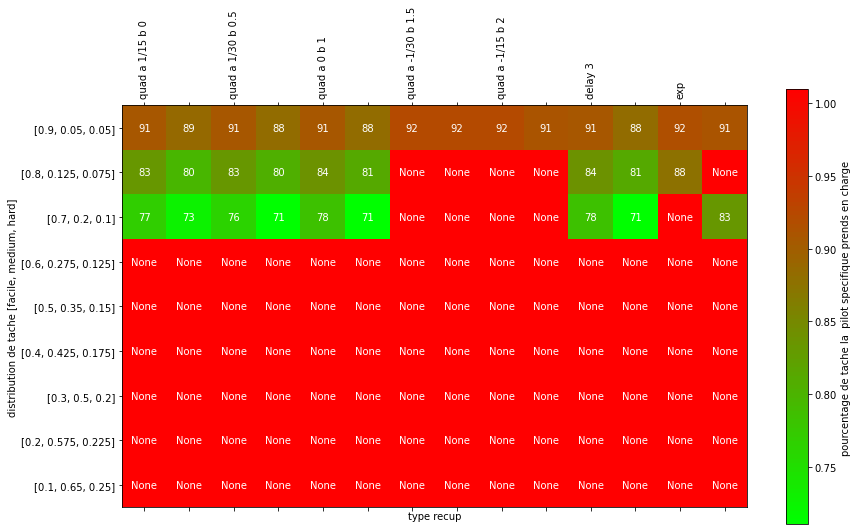

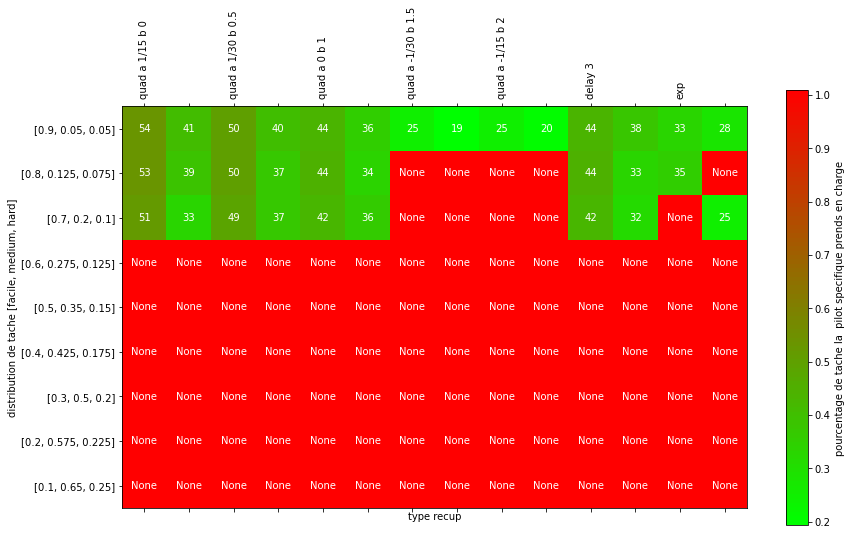

In [147]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

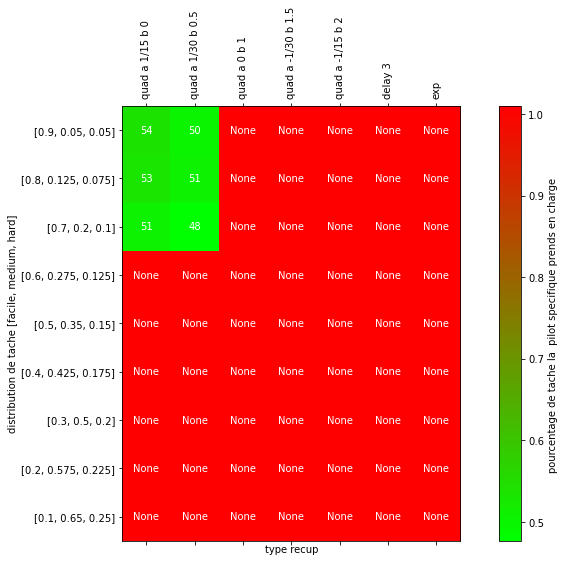

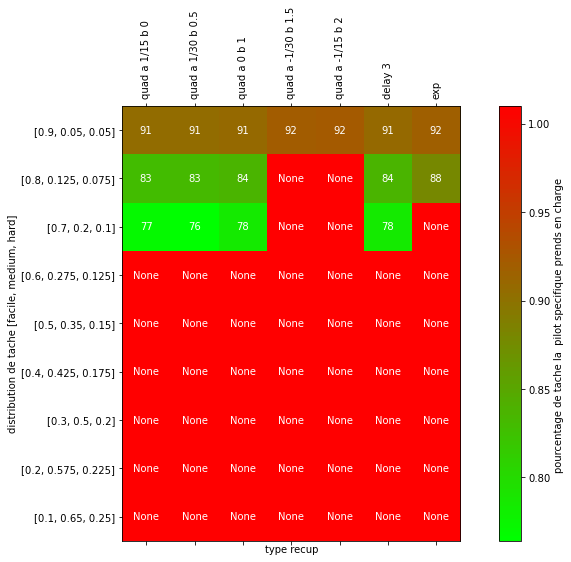

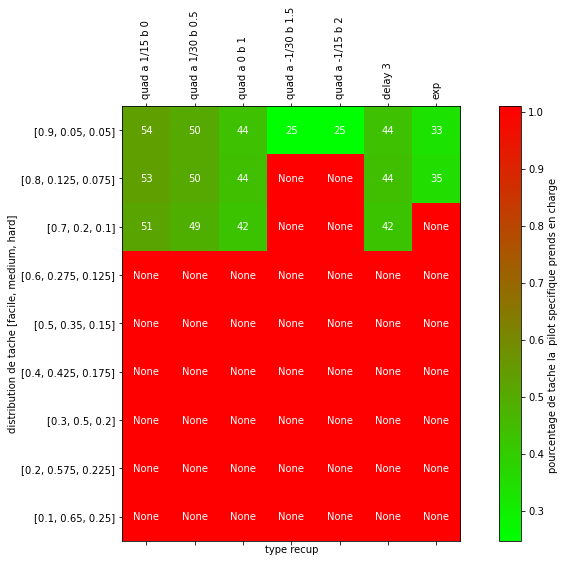

In [148]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot1(portion_pilot)

In [90]:
## IA 2 remplace humain 2 ou simple add IA 2 

In [91]:
exps =[91,9,22]
exps_san_niveau1= [91,9]
workloads =[80,80,80]
workloads_san_niveau1 = [80,80]
tache_time = generateTachetime(100)
nb= 100
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,21,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(22, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 2)

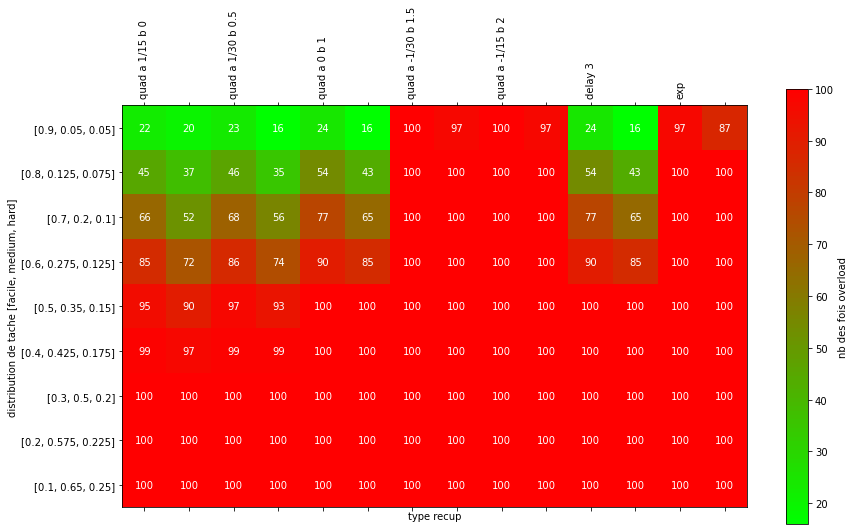

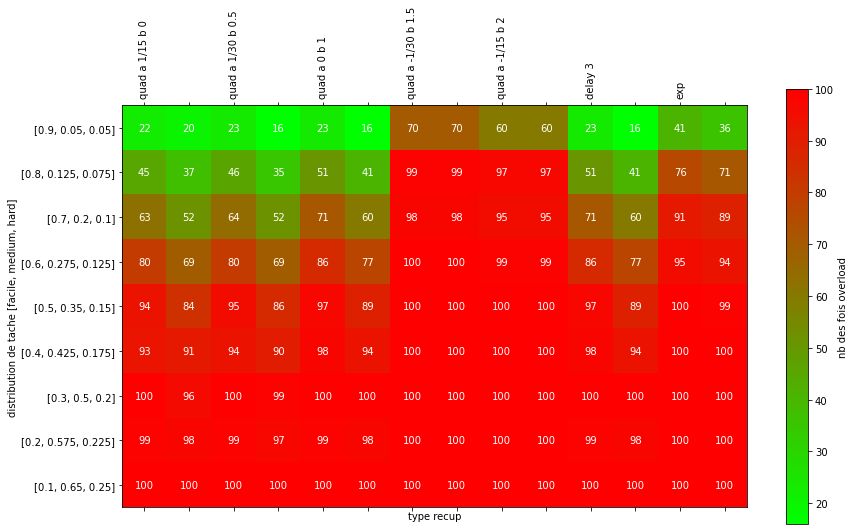

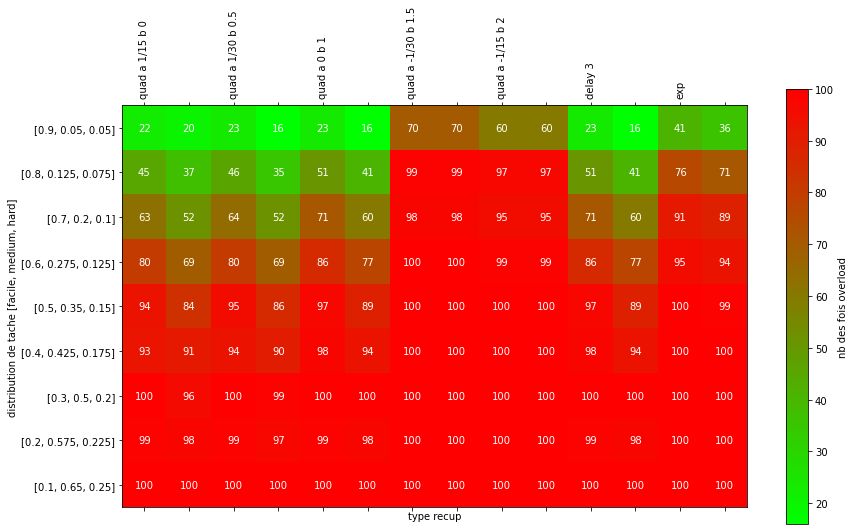

In [92]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

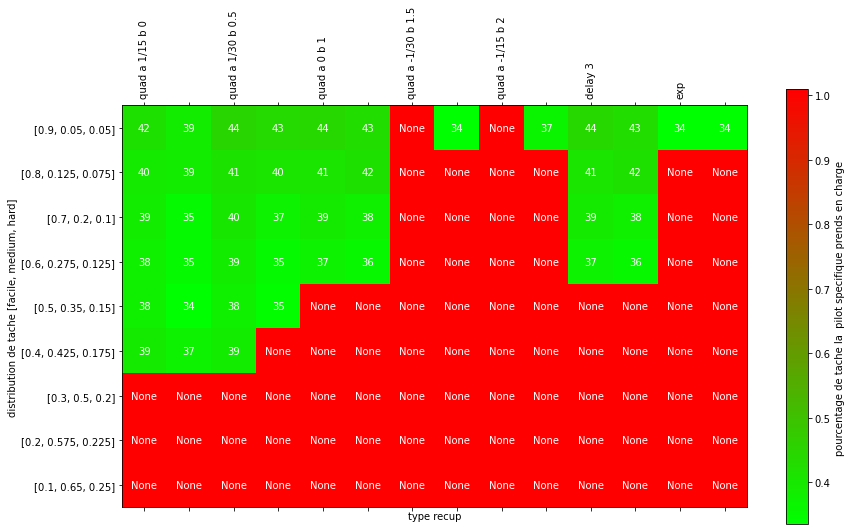

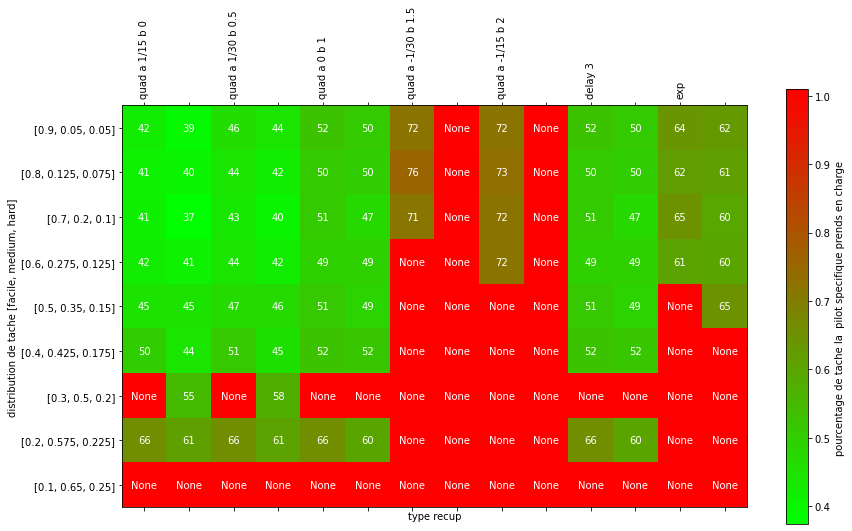

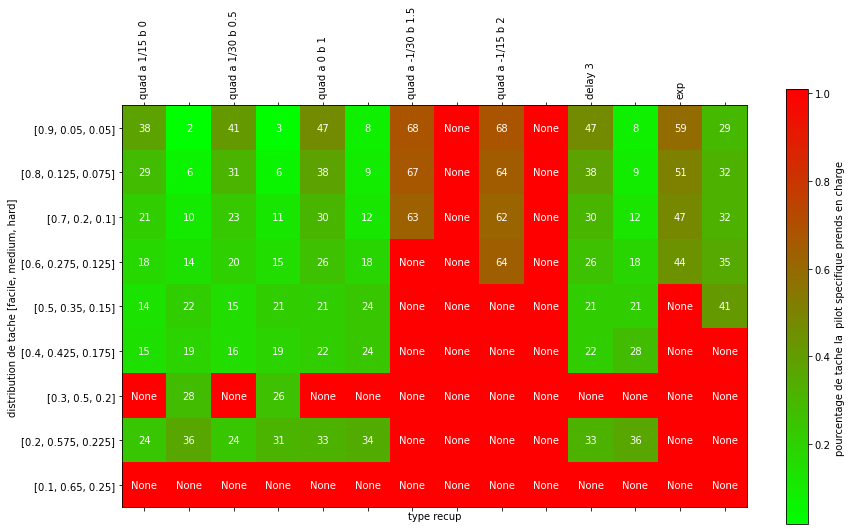

In [93]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [94]:
## meme exp  mais supprime humain niveau 1

In [95]:
exps =[91,22]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(100)
nb= 100
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,21,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(22, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

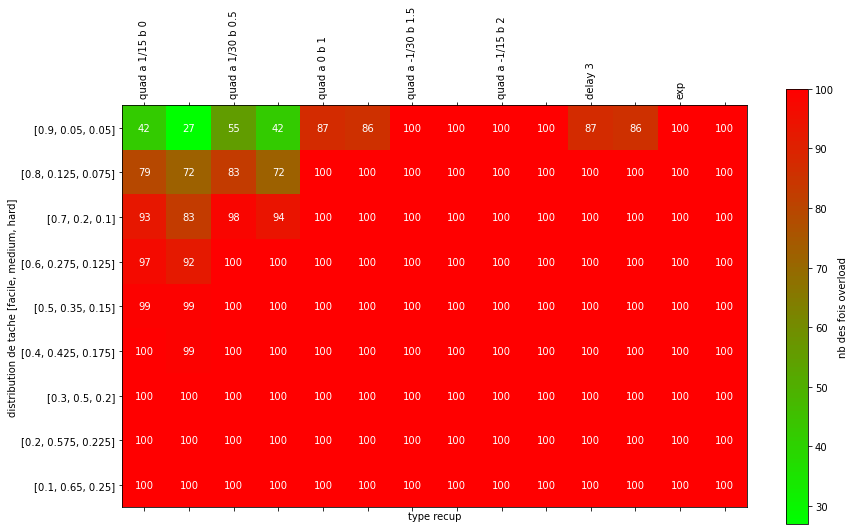

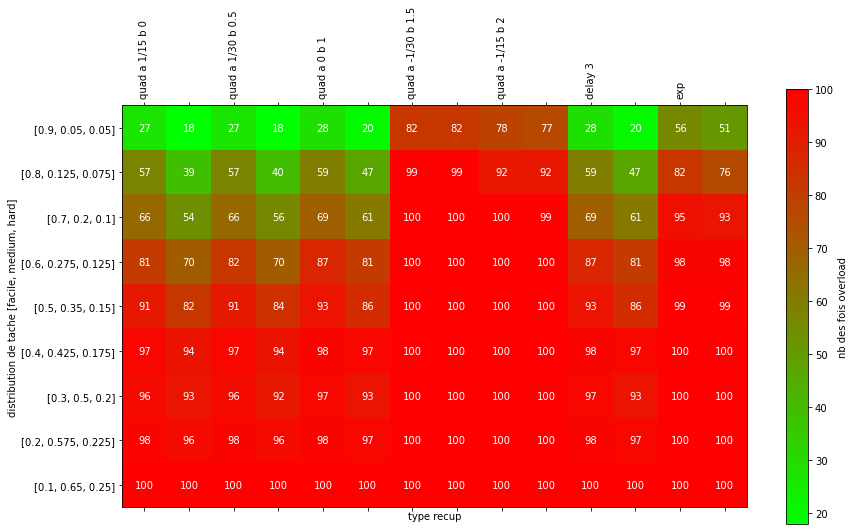

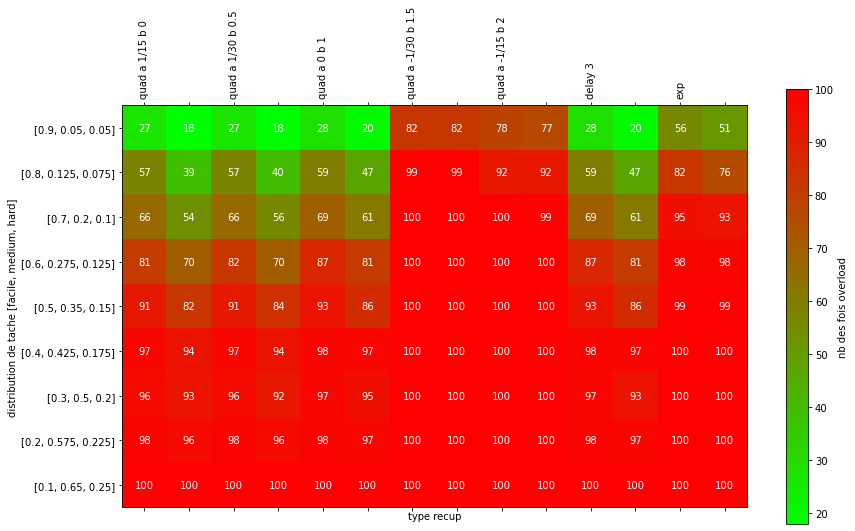

In [96]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

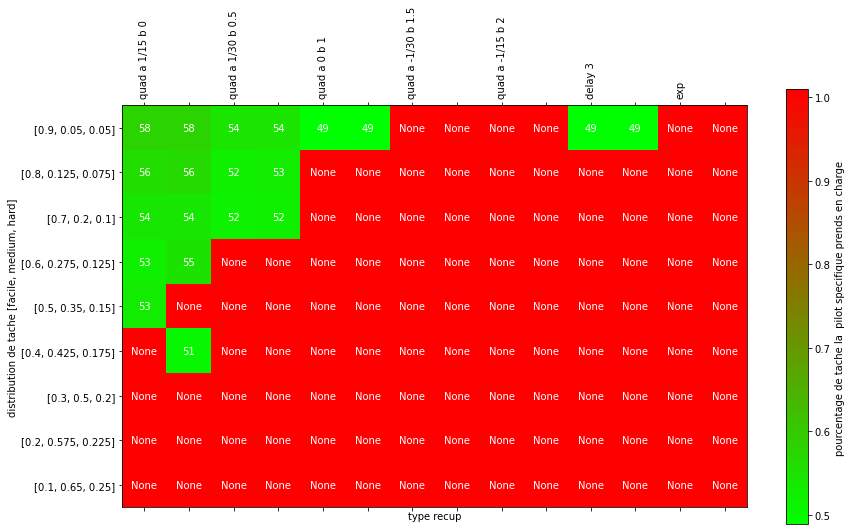

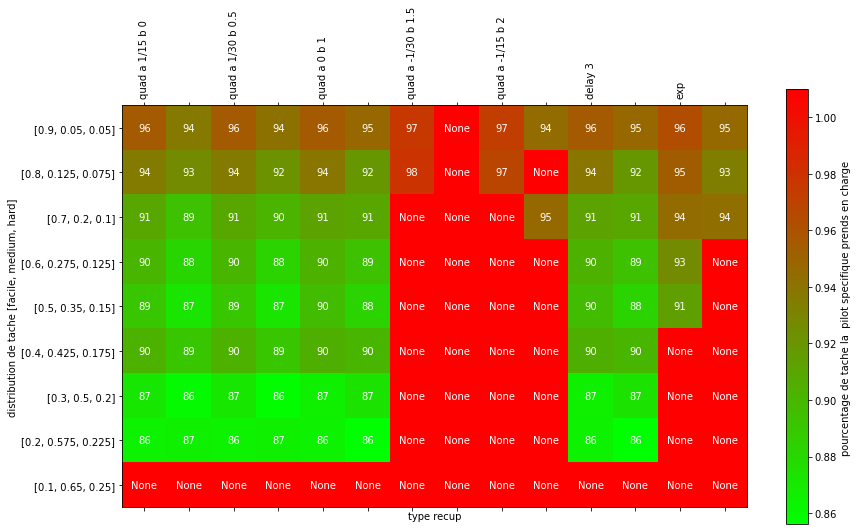

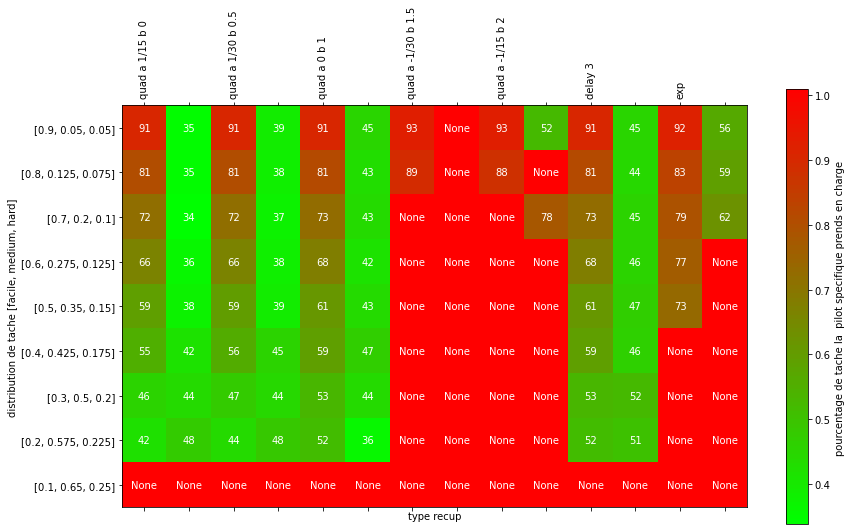

In [97]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [98]:
## meme exp mais remplace niveau 3

In [99]:
exps =[22, 9, 91]
exps_san_niveau1= [22,9]
workloads =[80,80,80]
workloads_san_niveau1 = [80,80]
tache_time = generateTachetime(100)
nb= 100
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,71,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(91, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 2)

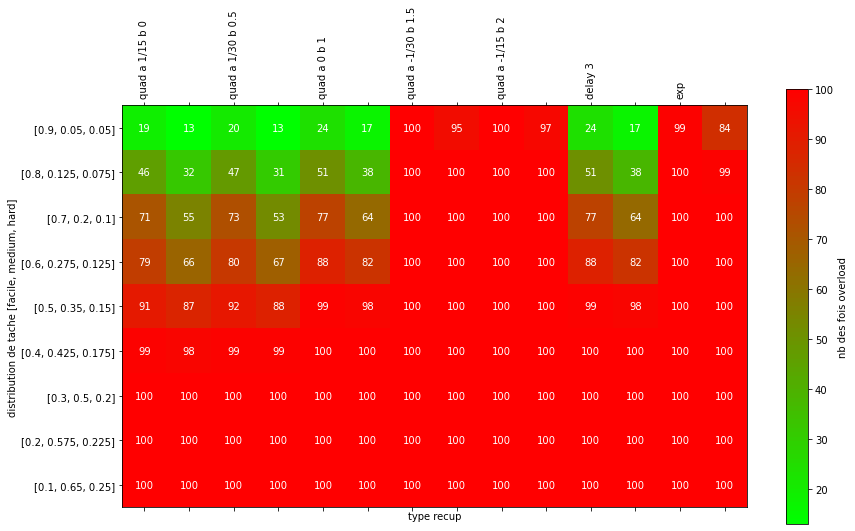

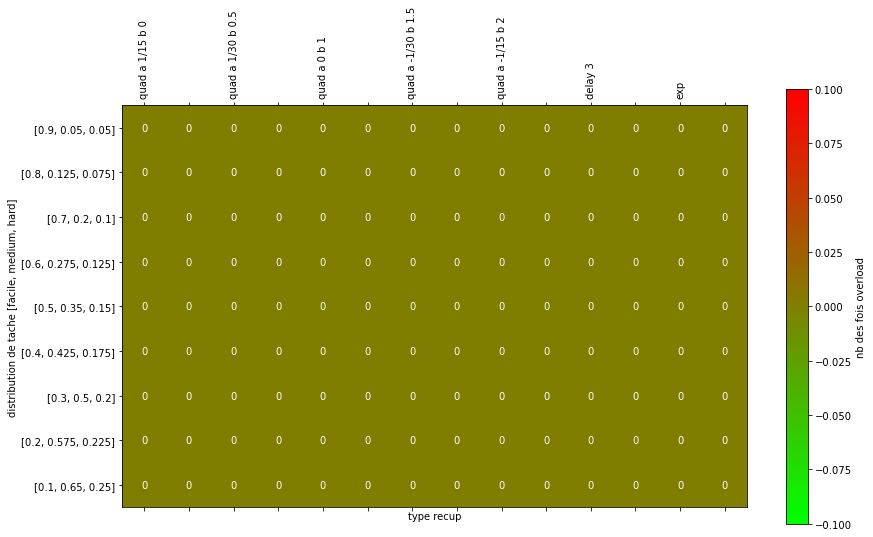

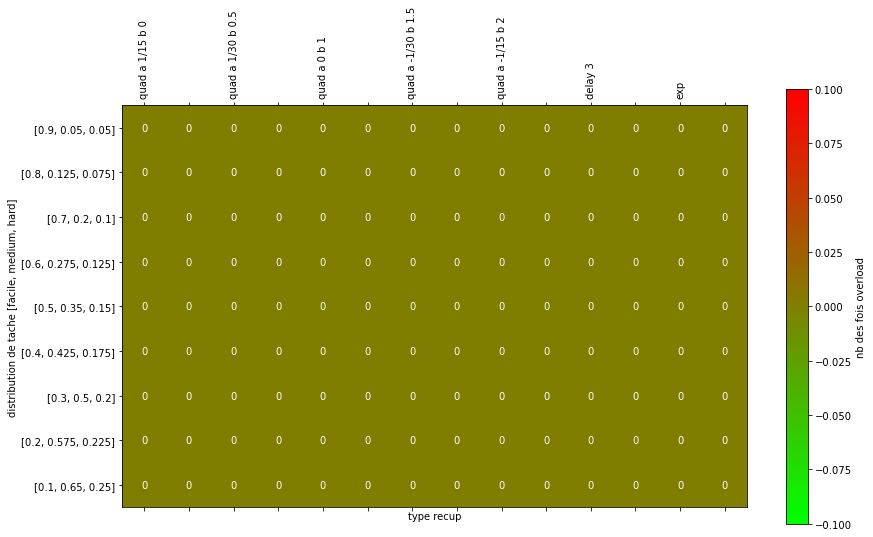

In [100]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

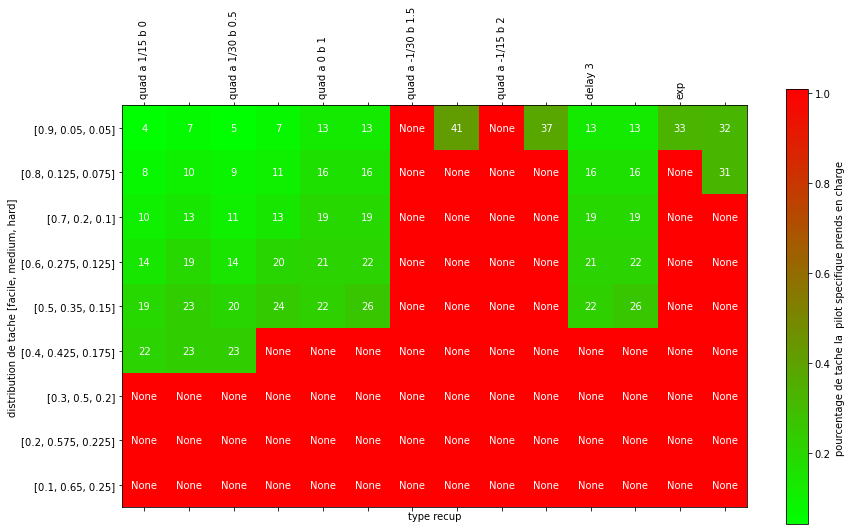

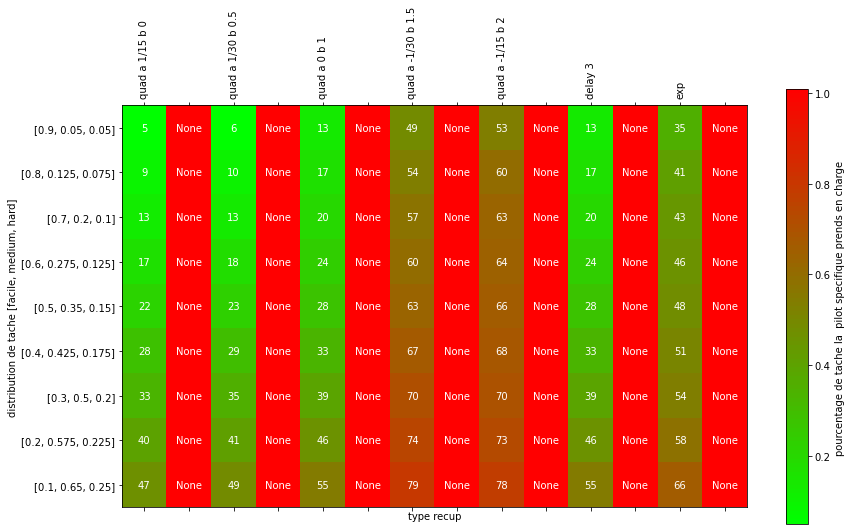

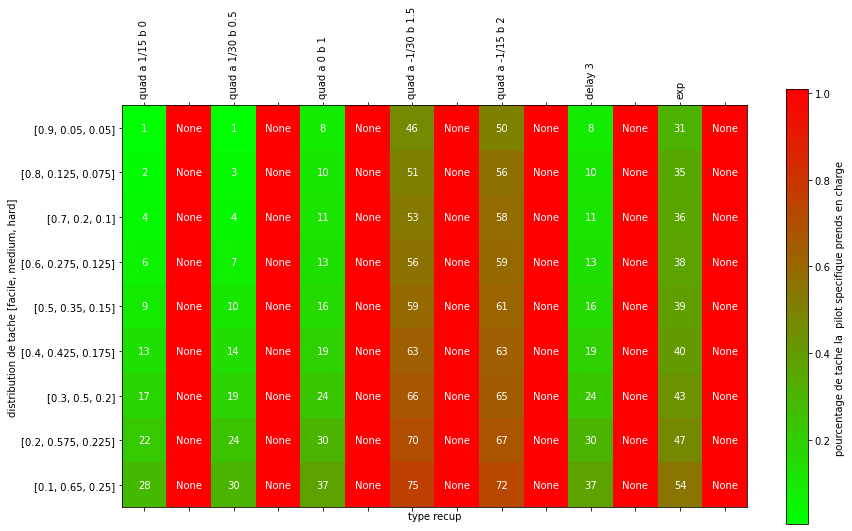

In [101]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [102]:
exps =[22, 91]
exps_san_niveau1= [22]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(100)
nb= 100
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,71,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(91, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

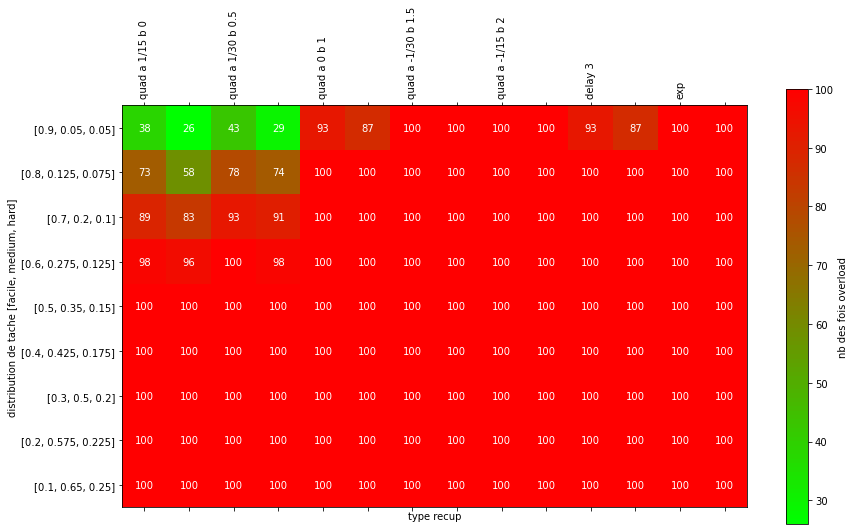

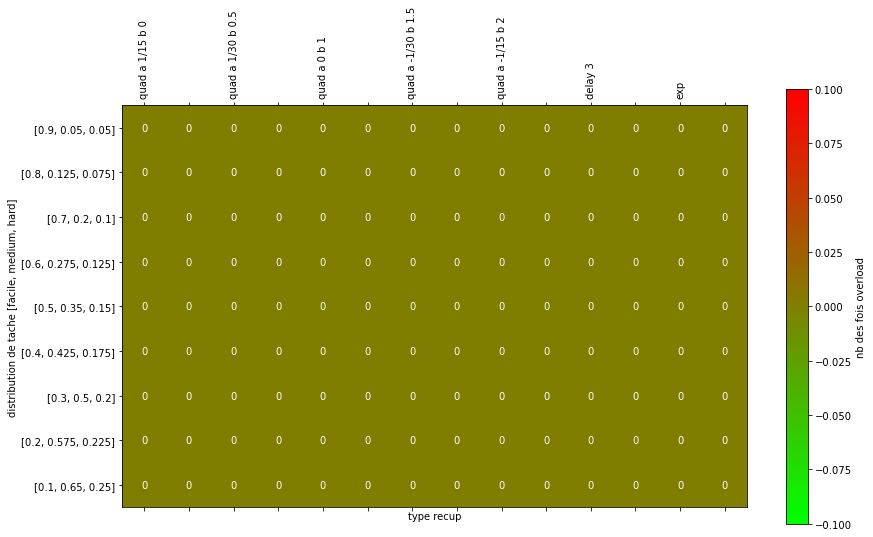

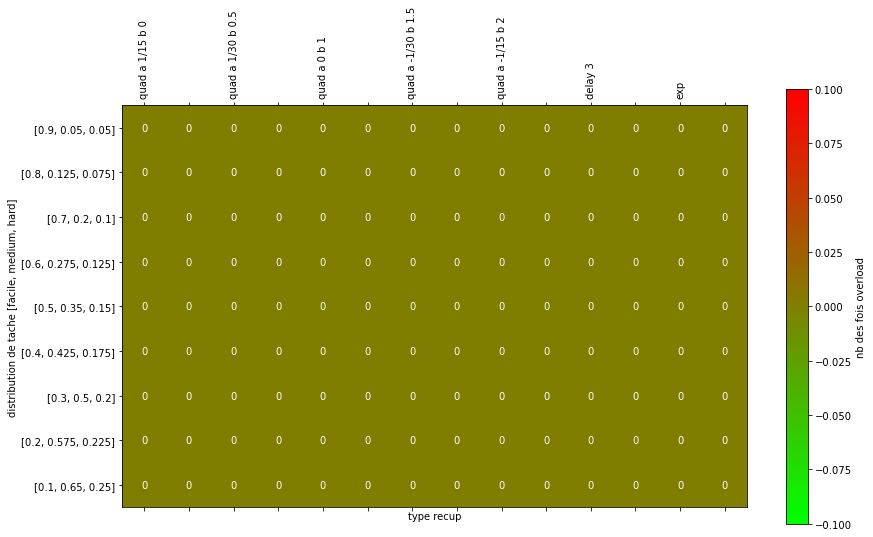

In [103]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

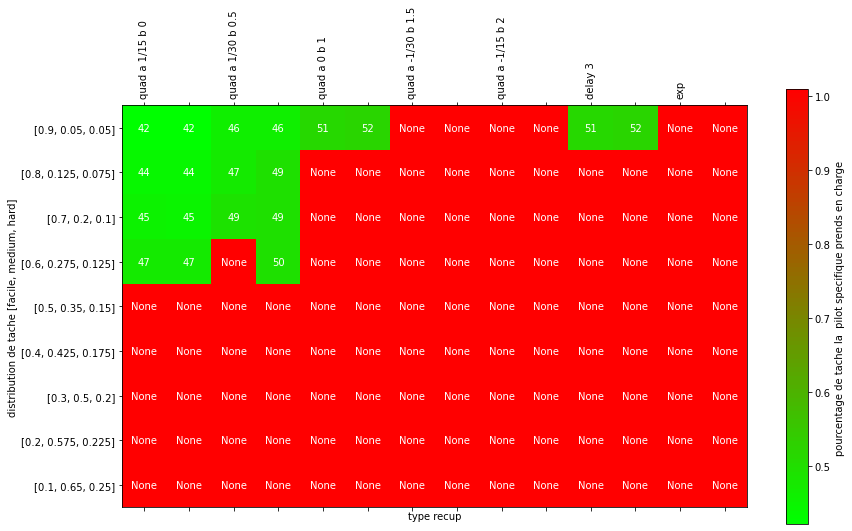

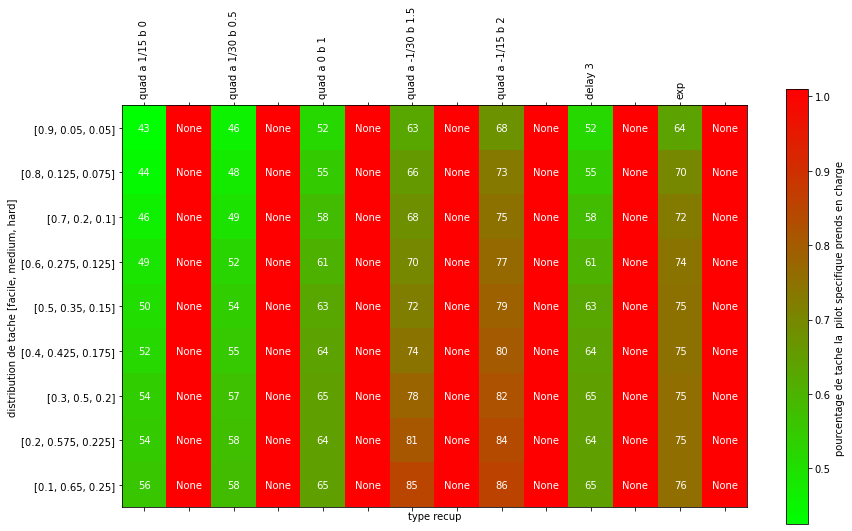

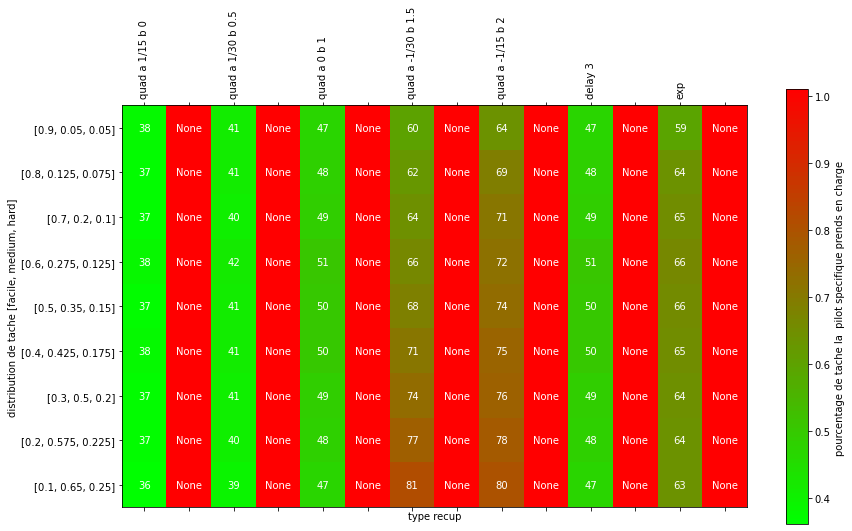

In [104]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

In [105]:
exps =[91,9]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(150)
nb= 150
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

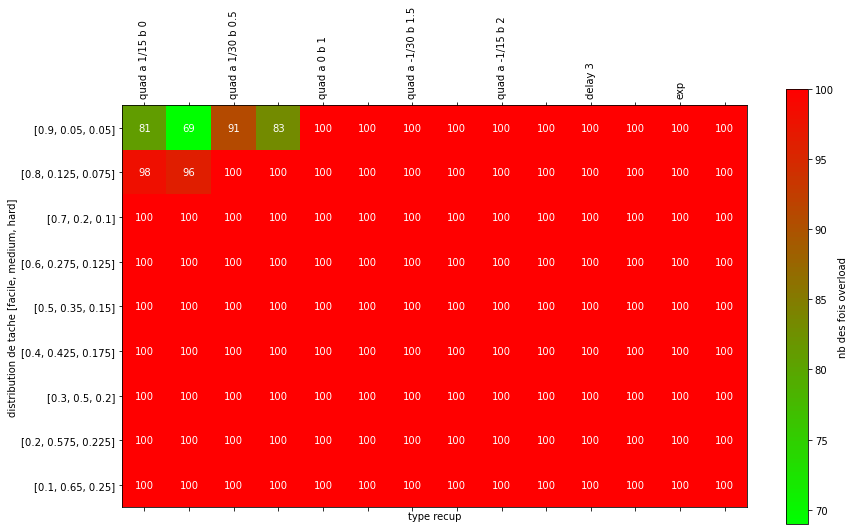

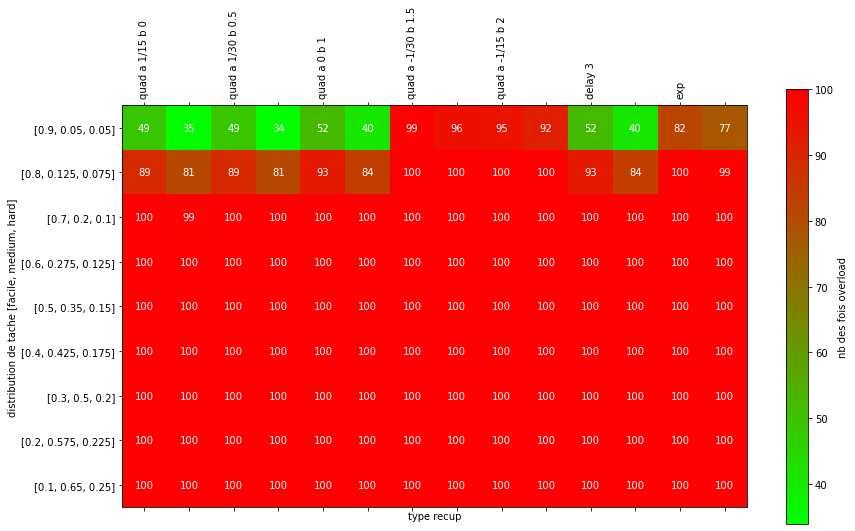

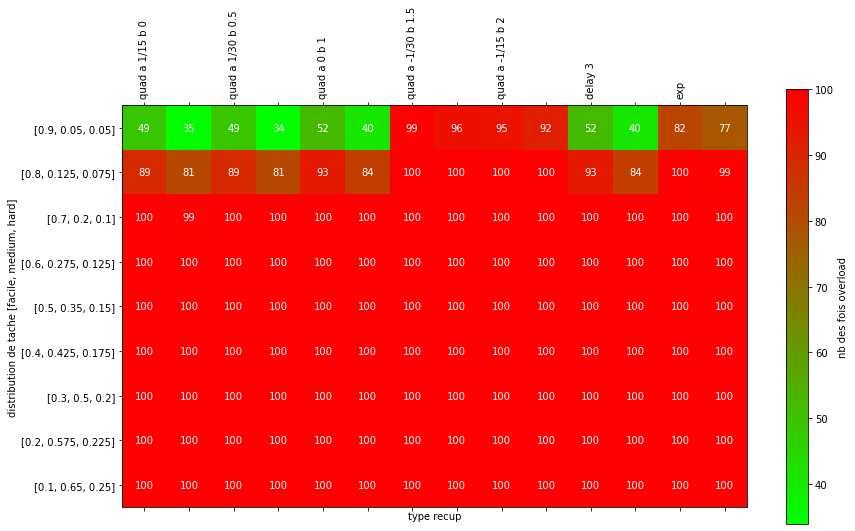

In [106]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

In [107]:
exps =[91,9]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(300)
nb= 300
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1,nb_step=2)

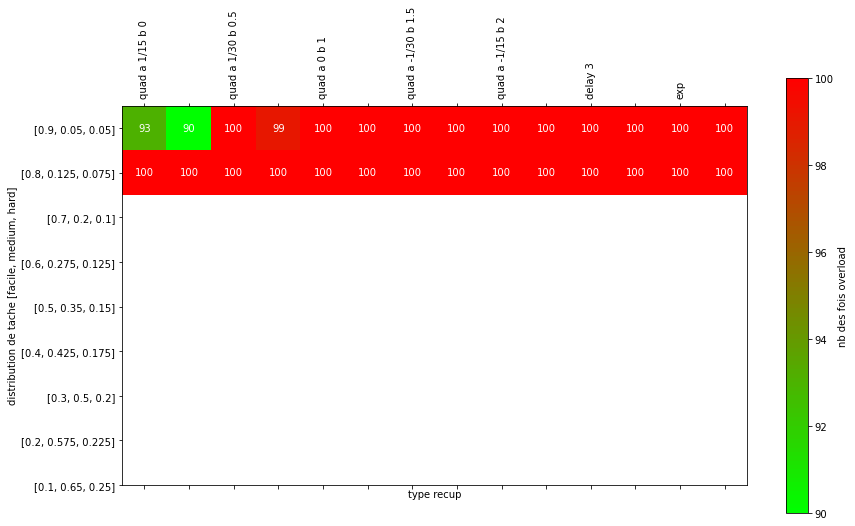

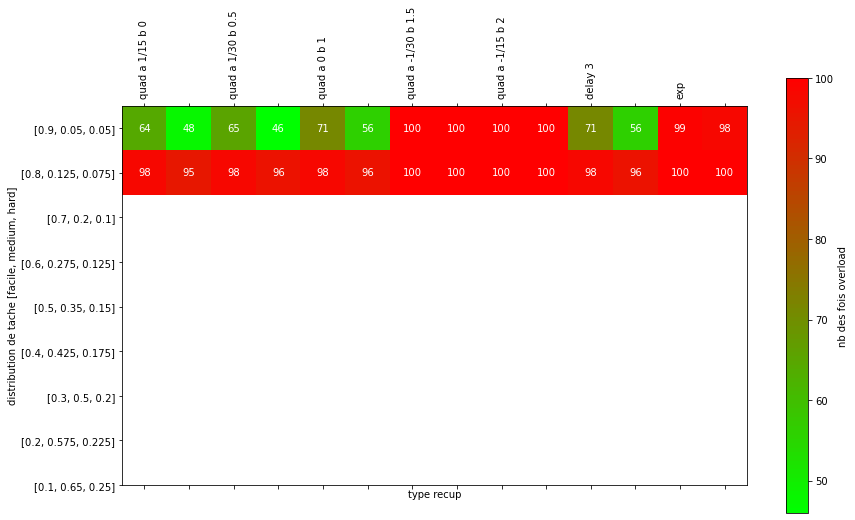

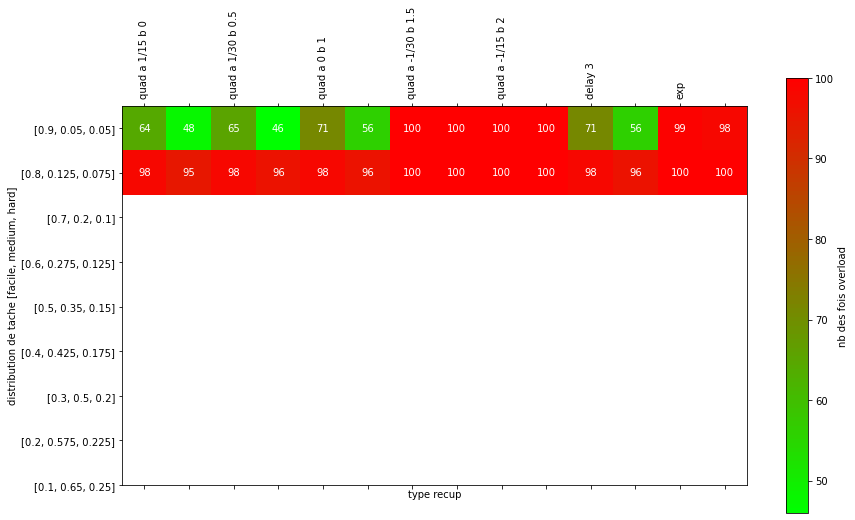

In [108]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

In [109]:
exps =[91,21,9]
exps_san_niveau1= [91,21]
workloads =[80,80,80]
workloads_san_niveau1 = [80,80]
tache_time = generateTachetime(50)
nb= 50
# 3 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 2 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 3 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)

In [110]:
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

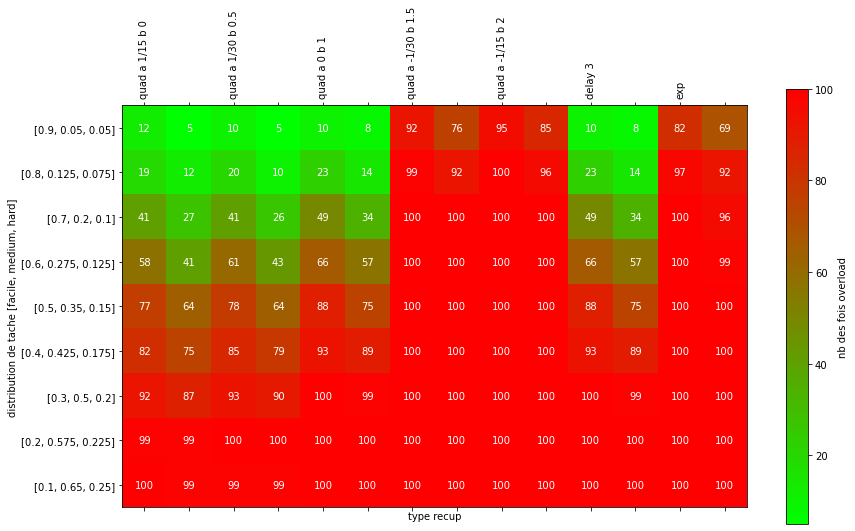

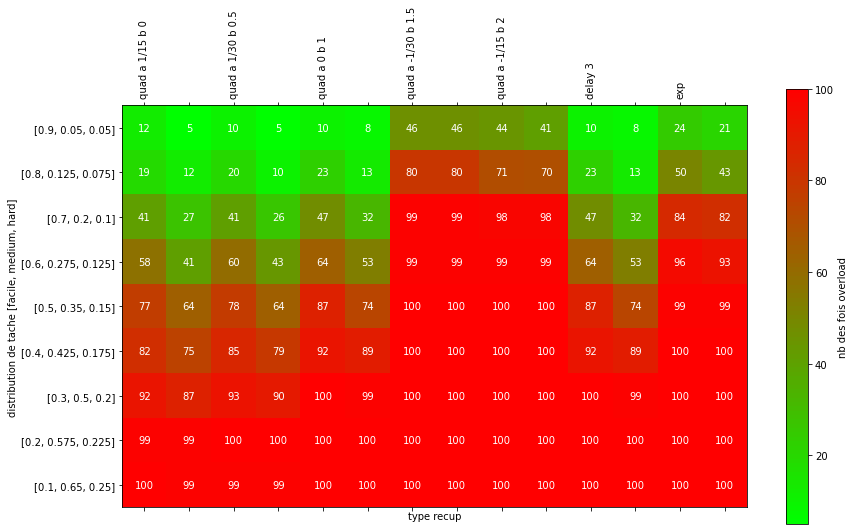

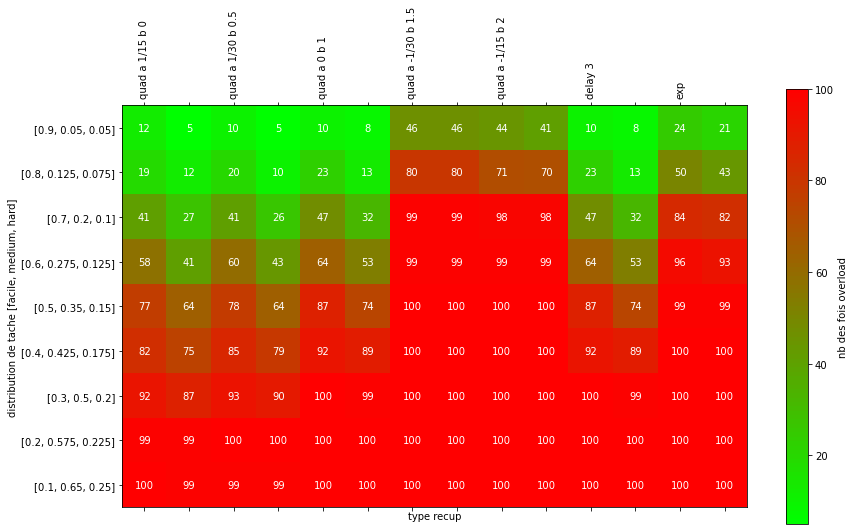

In [111]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

In [112]:
exps =[91,9]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(50)
nb= 50
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)

In [113]:
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1)

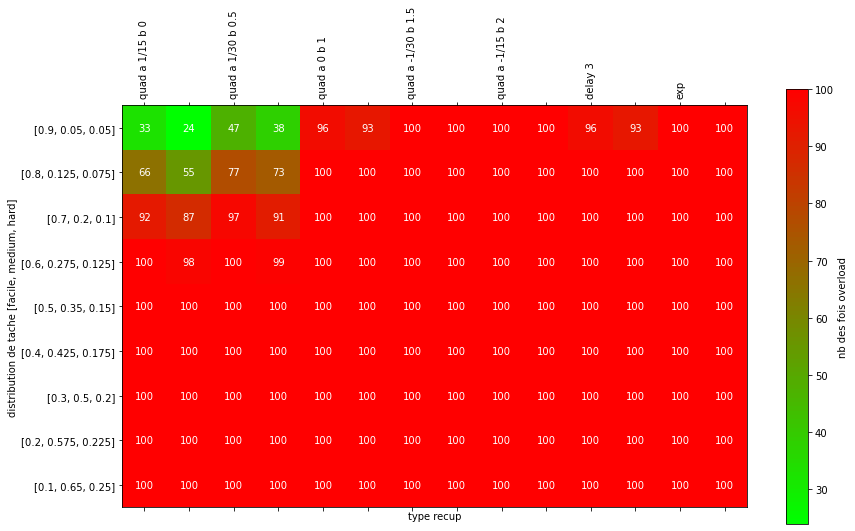

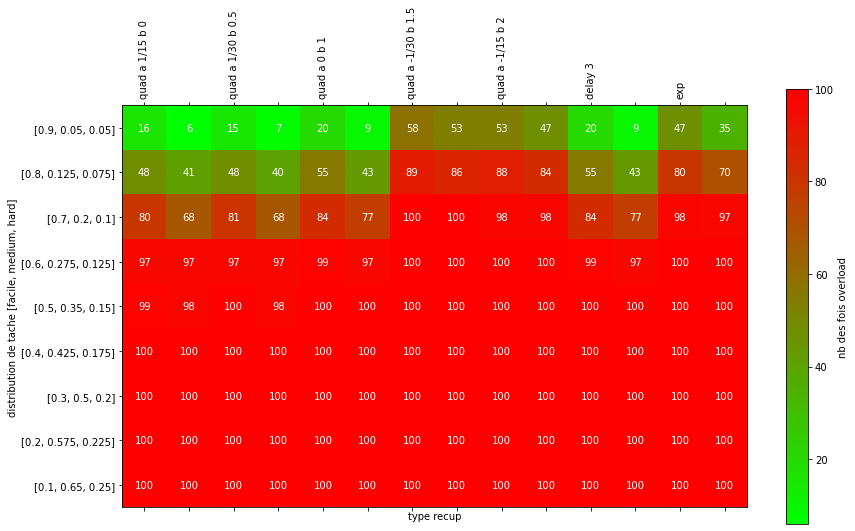

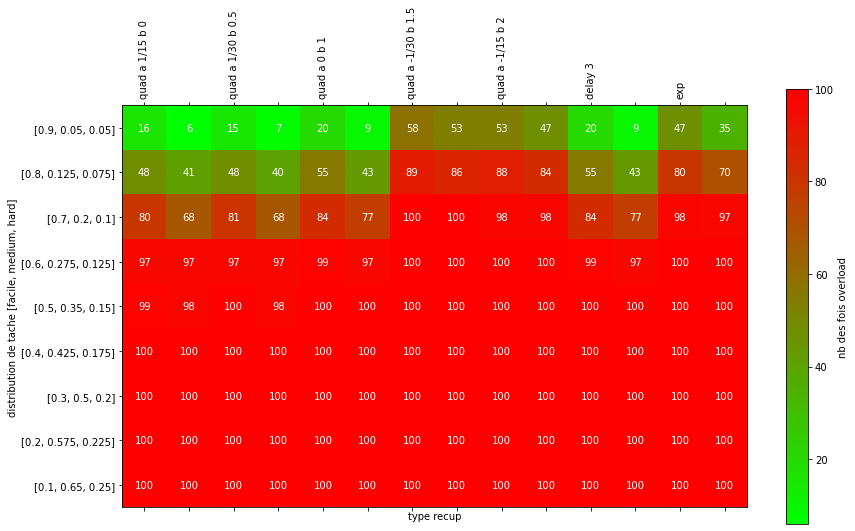

In [114]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

In [115]:
exps =[91,9]
exps_san_niveau1= [91]
workloads =[80,80]
workloads_san_niveau1 = [80]
tache_time = generateTachetime(90)
nb= 90
# 2 pilot H
pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
# 1 pilot H &1 pilotIA
pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
AddIA(pilotPool1,0,seuil)
# 2 pilot H &1 pilotIA
pilotPool2 =pilotPool1[:]
pilotPool2.append(pilot(9, seuil, 80, recuperation))
multisetPilotPool = []
multisetPilotPool.append(pilotPool)
multisetPilotPool.append(pilotPool1)
multisetPilotPool.append(pilotPool2)

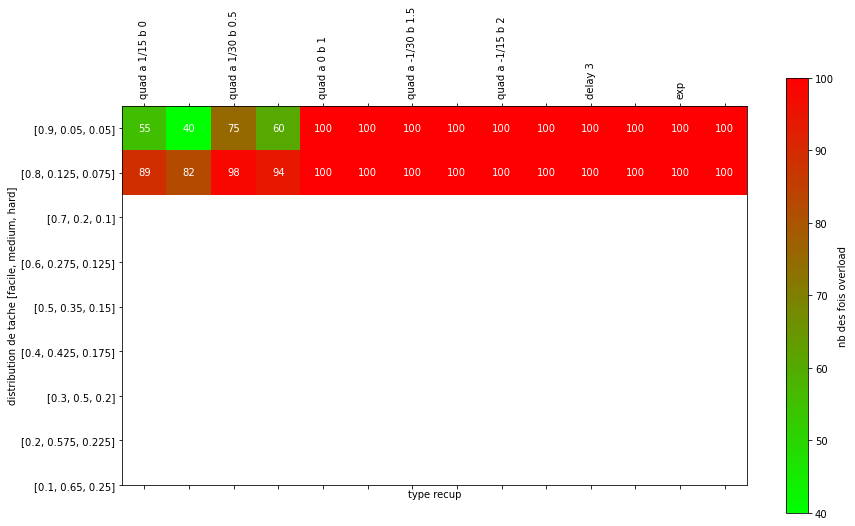

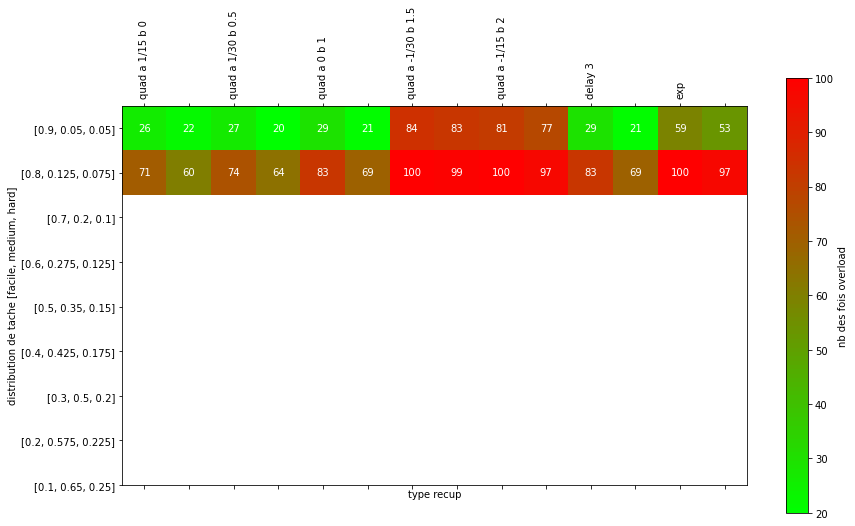

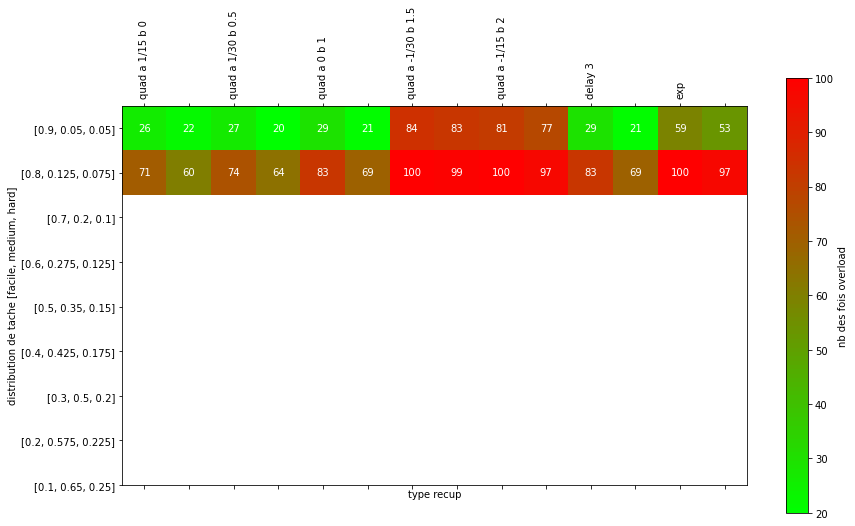

In [116]:
overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1,nb_step=2)
for overload_list in overload_list_all:
    affichage_recup(overload_list)

In [117]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from importlib import reload
import defini_coef
reload(defini_coef)
import util
reload(util)
import simulation
reload(simulation)
import pilot_tache_distribution
reload(pilot_tache_distribution)
import exp_v_nb_mission
reload(exp_v_nb_mission)
from defini_coef import *
from pilot_tache_distribution import*
from simulation import *
from util import *
import exp_v_nb_mission as v_nb_m 
import copy
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def determinerMaxDiff():
    prob_init = [0.95,0.05,0.00]
    step= [-0.05,0.05,0.0]
    type_recup = ["quad","other","exp"]
    seuil = [0,20, 70]
    recuperation = 1
    exps =[61,9]
    exps_san_niveau1= [61]
    workloads =[100,100]
    workloads_san_niveau1 = [100]
    # 2 pilot H
    pilotPool = generateFixPilot(exps,seuil,workloads,recuperation)
    # 1 pilot H &1 pilotIA
    pilotPool1= generateFixPilot(exps_san_niveau1,seuil,workloads_san_niveau1,recuperation)
    AddIA(pilotPool1,0,seuil)
    # 2 pilot H &1 pilotIA
    pilotPool2 =pilotPool1[:]
    pilotPool2.append(pilot(9, seuil, 80, recuperation))
    multisetPilotPool = []
    multisetPilotPool.append(pilotPool)
    multisetPilotPool.append(pilotPool1)

    nb = 0
    dif = 0
    for i in range(190,200,10):
        nb= i
        tache_time = generateTachetime(nb)
        overload_list_all,  portion_pilot_all = experience_recup_multiSetPilot(multisetPilotPool, tache_time = tache_time,nb=nb,index_pilot = 1,nb_step=5, prob_init = prob_init, step = step)
        for j in range(5):
            print(nb, j,overload_list_all[0][j][0], overload_list_all[1][j][0])
       

In [ ]:
determinerMaxDiff()

In [ ]:
determinerMaxDiff()

In [127]:
def affichage_recup1(overload_list, n_bins= 100,nb_step=9):
    stra_recup= ["quad a 1/15 b 0", "quad a 1/30 b 0.5","quad a 0 b 1", "quad a -1/30 b 1.5", "quad a -1/15 b 2", "delay 3", "exp",]
    colors = [(0, 1, 0), (1, 0, 0)]  # 绿色到红色
    
    cmap = LinearSegmentedColormap.from_list('GreenToRed', colors, N=n_bins)
    submatrix = overload_list[:, np.arange(overload_list.shape[1]) % 2 == 0]
    # Affichage de la matrice
    fig, ax = plt.subplots(figsize=(14, 8))
    cax = ax.matshow(submatrix, cmap=cmap)

    # Suppression des axes
    #ax.axis('off')
    prob_list = []

    for  i in range(nb_step):
        prob = [round(a + i*b,3) for a, b in zip(prob_init, step)]
        prob_list.append(prob)
    ax.set_xticks(np.arange(7))

    ax.set_xticklabels(stra_recup, rotation=90)
    for (i, j), val in np.ndenumerate(overload_list):
        if j%2==0:
            ax.text(j/2, i, f'{val*1:.0f}', ha='center', va='center', color='white')

    # Adding a color bar
    ax.set_yticks(np.arange(nb_step))
    ax.set_yticklabels(prob_list)

    ax.set_xlabel('type recup')  # Set the x-axis label
    ax.set_ylabel('distribution de tache [facile, medium, hard]')  # Set the y-axis label
    colorbar =plt.colorbar(cax)
    colorbar.set_label('nb des fois overload')
    plt.savefig("different_type_recup.pdf")
    plt.show()

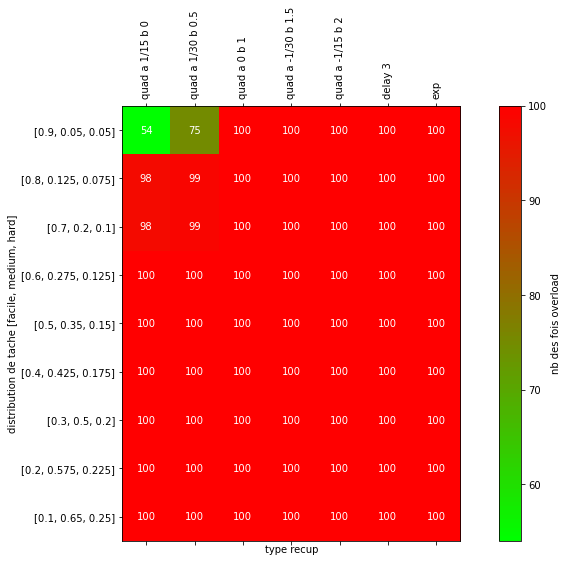

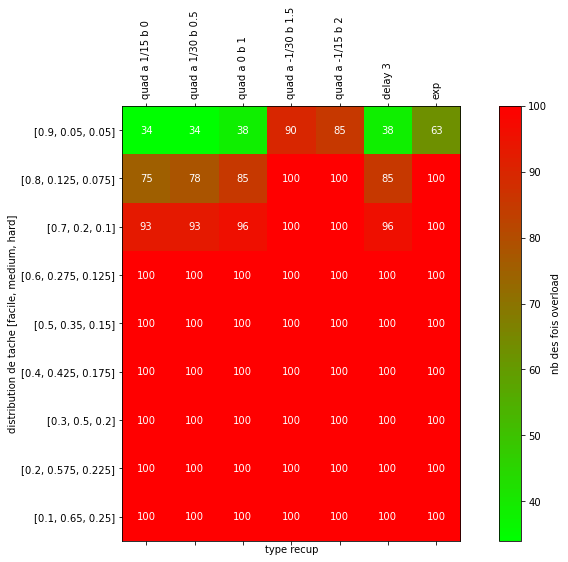

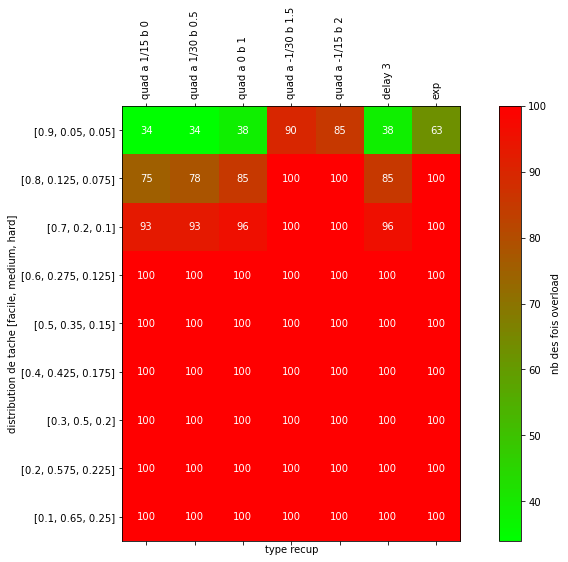

In [128]:
for overload_list in overload_list_all:
    affichage_recup1(overload_list)

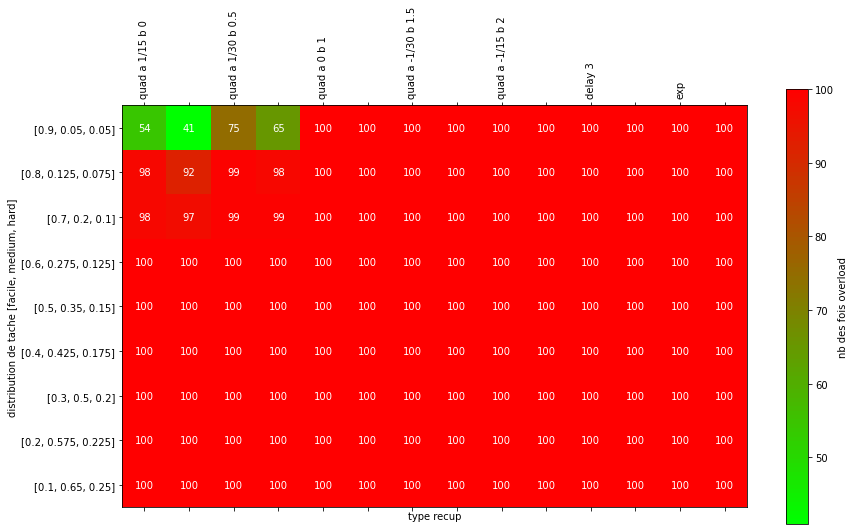

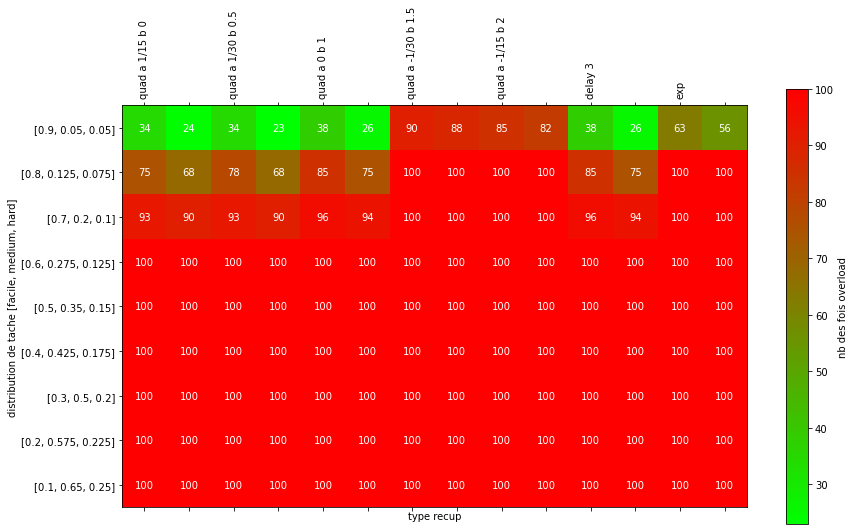

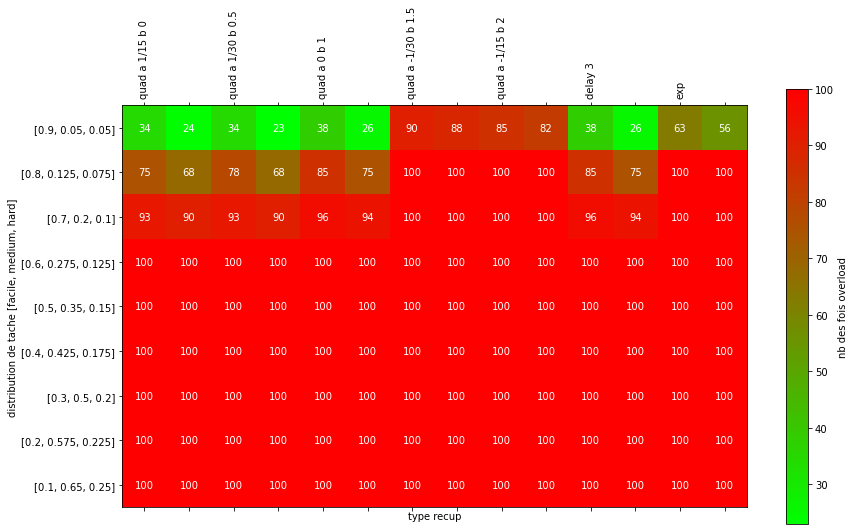

In [129]:
for overload_list in overload_list_all:
    affichage_recup(overload_list)

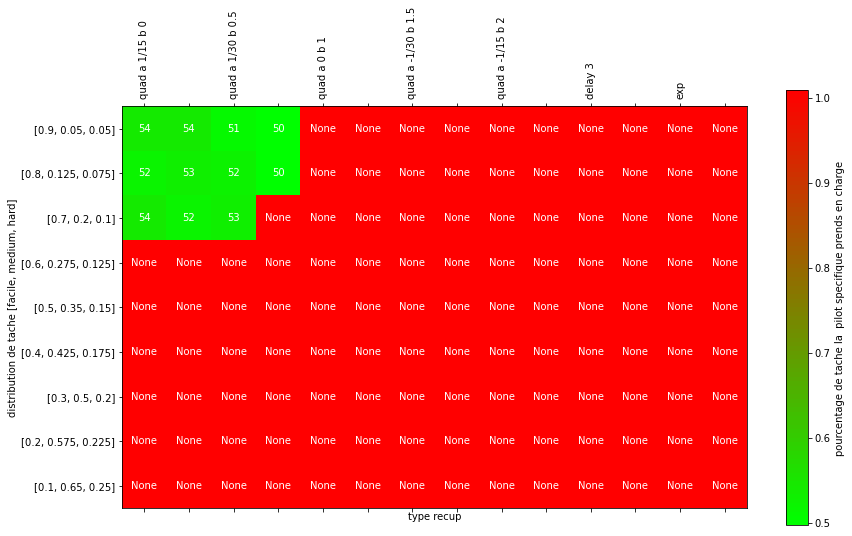

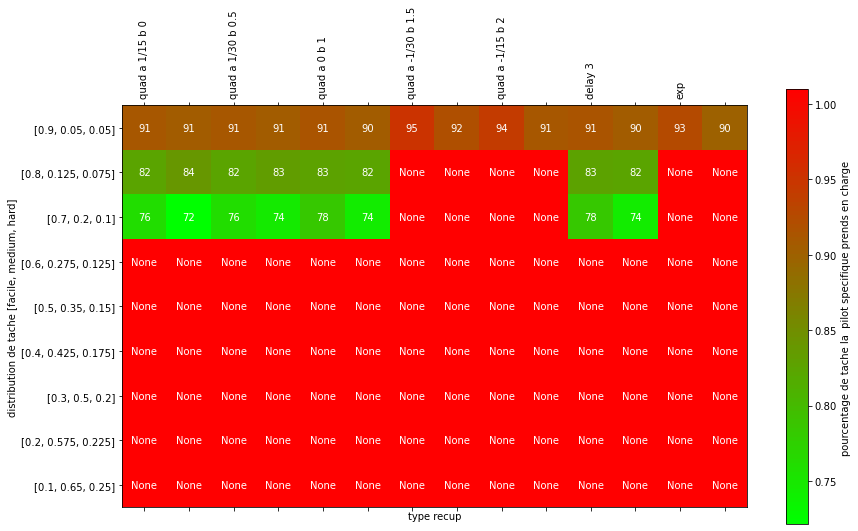

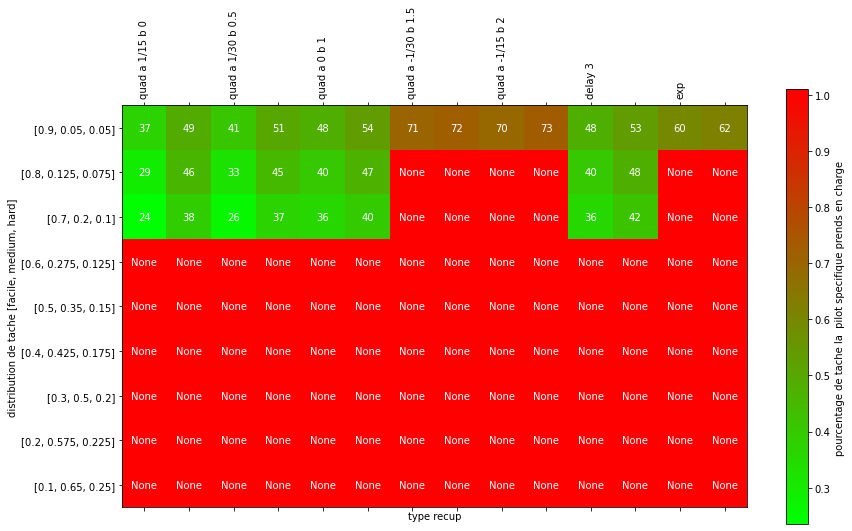

In [131]:

for portion_pilot in portion_pilot_all:
    affichage_portion_pilot(portion_pilot)

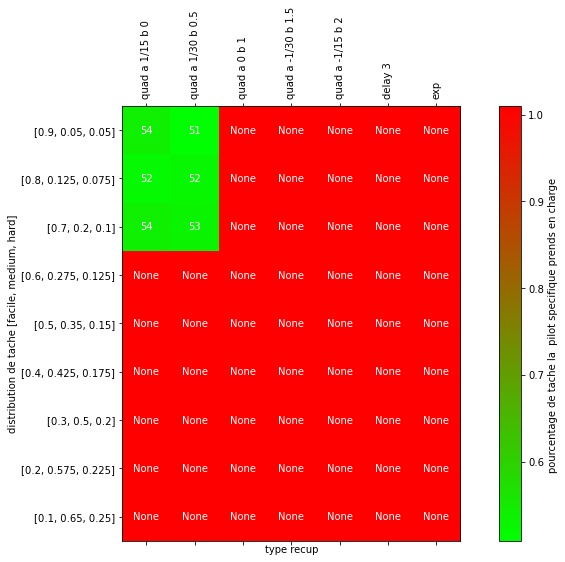

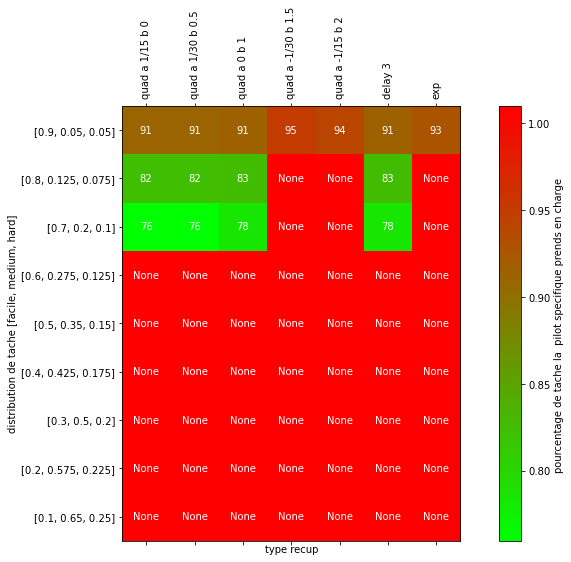

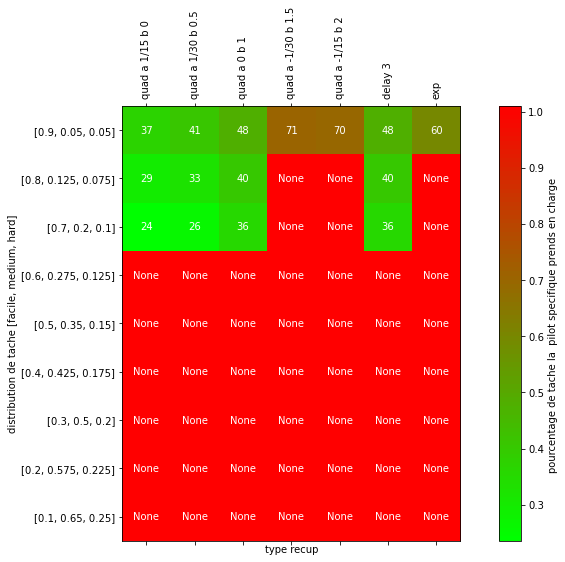

In [132]:
for portion_pilot in portion_pilot_all:
    affichage_portion_pilot1(portion_pilot)

In [130]:
def affichage_portion_pilot1(portion_pilot, n_bins= 100):
    stra_recup= ["quad a 1/15 b 0", "quad a 1/30 b 0.5","quad a 0 b 1", "quad a -1/30 b 1.5", "quad a -1/15 b 2", "delay 3", "exp",]
    colors = [(0, 1, 0), (1, 0, 0)]  # 绿色到红色
    submatrix = portion_pilot[:, np.arange(portion_pilot.shape[1]) % 2 == 0]
    cmap = LinearSegmentedColormap.from_list('GreenToRed', colors, N=n_bins)

    # Affichage de la matrice
    fig, ax = plt.subplots(figsize=(14, 8))
    cax = ax.matshow(submatrix, cmap=cmap)

    # Suppression des axes
    #ax.axis('off')
    prob_list = []

    for  i in range(9):
        prob = [round(a + i*b,3) for a, b in zip(prob_init, step)]
        prob_list.append(prob)
    ax.set_xticks(np.arange(7))

    ax.set_xticklabels(stra_recup, rotation=90)
    for (i, j), val in np.ndenumerate(portion_pilot):
        if j%2==0:
            if val<=1:
                ax.text(j/2, i, f'{val*100:.000f}', ha='center', va='center', color='white')
            else:
                ax.text(j/2, i, f'{None}', ha='center', va='center', color='white')

    # Adding a color bar
    ax.set_yticks(np.arange(9))
    ax.set_yticklabels(prob_list)

    ax.set_xlabel('type recup')  # Set the x-axis label
    ax.set_ylabel('distribution de tache [facile, medium, hard]')  # Set the y-axis label
    colorbar =plt.colorbar(cax)
    colorbar.set_label('pourcentage de tache la  pilot specifique prends en charge ')
    plt.savefig("portion_pilot.pdf")
    plt.show()